# Data Preprocessing

# Machine Learning - EX1

# Functions for reuse

In [1]:
# Inspect range and datatypes of each column of a dataframe
def col_ranges_and_types(df):
    
    feature_types = df.dtypes
    
    feature_details = []
    
    for feature in df.columns:

        # categorical column 
        if feature_types[feature] == 'object':
            details = df[feature].dropna().unique().tolist()

        # Numeric column
        else:
            details = (df[feature].min(), df[feature].max())
        
        # Append feature name, range and data type 
        feature_details.append({
            'Feature': feature,
            'Value Range / Possible Values': details,
            'Data Type': feature_types[feature]
        })
    
    return pd.DataFrame(feature_details)

In [2]:
# Clean columns: remove whitespaces and tabs. Questionsmarks replace ? wit nan

def clean_columns(df):
    for col in df.columns:
        if df[col].dtype == object:
            
            # remove spaces, tabs and replace '?' with NaN
            df[col] = df[col].replace(r'\s+', '', regex=True).replace('?', np.nan)
            
    return df

In [3]:
def plot_numeric_distributions(df, numeric_columns = None):
   
    # number of numerical columns
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=np.number).columns

    n_cols = 4
    n_rows = int(np.ceil(len(numeric_columns) / n_cols))
    
    # grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    
    axes = axes.flatten()
    #print(axes)
    
    #  density plot for each column
    for ax, col in zip(axes, numeric_columns):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Density')

    for ax in axes[len(numeric_columns):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

In [4]:
# Clean columns: remove whitespaces and tabs. Questionsmarks replace ? wit nan

def clean_columns(df):
    for col in df.columns:
        if df[col].dtype == object:
            
            # remove spaces, tabs and replace '?' with NaN
            df[col] = df[col].replace(r'\s+', '', regex=True).replace('?', np.nan)
            
    return df

In [5]:
def plot_numeric_distributions(df, numeric_columns = None):
   
    # number of numerical columns
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=np.number).columns

    n_cols = 4
    n_rows = int(np.ceil(len(numeric_columns) / n_cols))
    
    # grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    
    axes = axes.flatten()
    #print(axes)
    
    #  density plot for each column
    for ax, col in zip(axes, numeric_columns):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Density')

    for ax in axes[len(numeric_columns):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

In [6]:
def plot_categorical_distributions(df, categorical_columns):
    
    
    n_cols = 4  #  columns in the grid 
    n_rows = int(np.ceil(len(categorical_columns) / n_cols))  

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    
    # Flatten axes array for iterating
    axes = axes.flatten()
    
    #create a bar plot for each one
    for ax, col in zip(axes, categorical_columns):
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Counts')
        for item in ax.get_xticklabels(): 
            item.set_rotation(45) # rotate x ticks
        
    # Remove any unused plots
    for ax in axes[len(categorical_columns):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

## Tasks
You will choose 3 different classifiers from different types of learning algorithms

- So in the end you will have 4 × 3 combinations of datasets × classifiers
- You can use any classifier - ones already covered in the lecture, ones that will be covered in the lecture, and also those that won’t be covered in the lecture
- But make sure that you choose from at least two different “types” / “paradigms” - i.e. do
not choose 3 tree-based classifiers, or 3 NN based classifiers, or 3 ensembles

## Steps

- Importing the data
- Data Exploration and Preprocessing (missing values, outliers, scaling, encoding, etc.)
- Run classifiers, and Experiment with:
- Different classifiers and your datasets
   - Different parameter settings (= several results per classifier per dataset, not only random/best)

## Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Data

In [8]:
kidney = pd.read_csv('datasets/kidney_disease.csv')
# kidney.head()

housing = pd.read_csv('datasets/housing.csv')
amazon_train = pd.read_csv('datasets/train_amazon_review.csv')
amazon_test = pd.read_csv('datasets/test_amazon_review.csv')
voting_train = pd.read_csv('datasets/train_CongressionalVoting.csv')
voting_test = pd.read_csv('datasets/test_CongressionalVoting.csv')

# Housing: Data imputation
## Imputation Type: Regression

## Analyzing which imputation type performs the best: Regression & KNN
Results:
-   Linear Regression
    -   3 columns with high correlation to "total_bedrooms" ("total_rooms","population","households"): 5875 (MSE)
    -   8 columns (no "ocean_proximity"): 4900 (MSE)
-   KNN
    -   3 columns with high correlation to "total_bedrooms" ("total_rooms","population","households"):
        -   MinMaxScaler:
            -   n = 1: 5301 (MSE)
            -   n = 2: 3958 (MSE)
            -   n = 3: 3653 (MSE)
            -   n = 4: 3461 (MSE)
            -   n = 5: 3430 (MSE)
            -   n = 6: 3460 (MSE)
            -   n = 7: 3426 (MSE)
            -   n = 8: 3521 (MSE)
            -   n = 9: 3548 (MSE)
            -   n = 10: 3550 (MSE)
            -   n = 15: 3791 (MSE)
            -   n = 30: 4392 (MSE)
        -   RobustScaler:
            -   n = 5: 3595 (MSE)
            -   n = 6: 3581 (MSE)

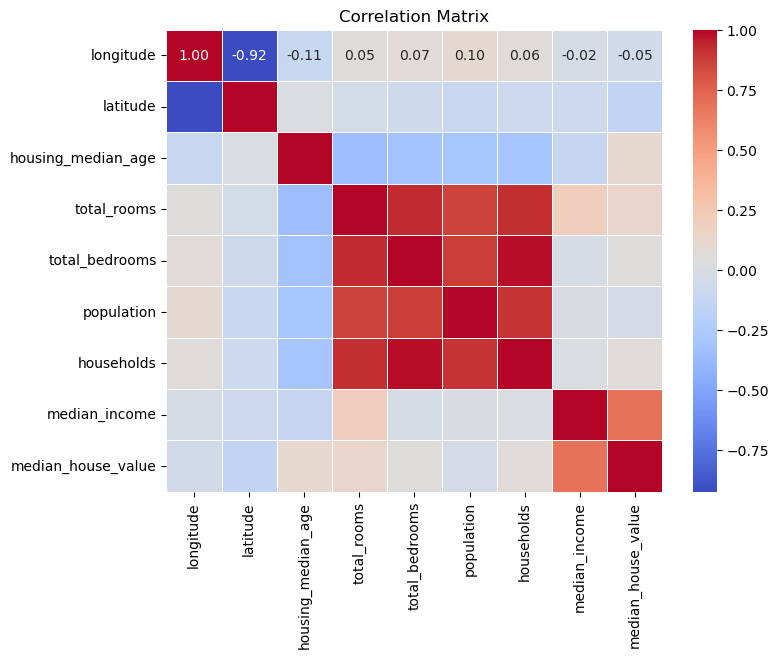

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

clean_rows = housing.dropna()

# Extract the indices of clean rows
clean_indices = clean_rows.index

# Create a new dataframe containing only clean rows and preserve original indices
clean_housing = housing.loc[clean_indices]

# Calculate the correlation matrix
correlation_matrix = clean_housing.drop(columns=['ocean_proximity']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create a copy of the clean dataframe
clean_df = clean_housing.copy()
clean_df = clean_df.drop(columns=['ocean_proximity'])
#clean_df = clean_df[['total_rooms', 'total_bedrooms', 'population', 'households']]

df_copy = clean_df.copy()

# Initialize total mean square error
total_mse = 0

# Iterate through each row in the clean dataframe
for index, row in clean_df.iterrows():
    # Remove the value in the "total_bedrooms" column for the current row
    df_copy.loc[index, 'total_bedrooms'] = None
    
    # Separate features (X) and target (y)
    X = df_copy.drop(columns=['total_bedrooms'])
    y = df_copy['total_bedrooms']
    
    # Drop current row from X and y
    X = X.drop(index)
    y = y.drop(index)
    
    # Create and fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict the value of 'total_bedrooms' for the current row
    predicted_value = model.predict([row.drop('total_bedrooms').values])[0]
    
    # Compute square error
    square_error = (predicted_value - row['total_bedrooms']) ** 2
    
    # Add square error to total mean square error
    total_mse += square_error

    print(f"Index: {index} | Real value: {row['total_bedrooms']} | Estimated value: {predicted_value} | Error: {square_error}")
    
    # Restore the value of 'total_bedrooms' for the current row
    df_copy.loc[index, 'total_bedrooms'] = row['total_bedrooms']

# Compute total mean square error
total_mean_square_error = total_mse / len(clean_df)

print("Total Mean Square Error:", total_mean_square_error)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 0 | Real value: 129.0 | Estimated value: 66.61102577128668 | Error: 3892.384105311055
Index: 1 | Real value: 1106.0 | Estimated value: 1226.9750567754872 | Error: 14634.964361832363
Index: 2 | Real value: 190.0 | Estimated value: 144.66182379469114 | Error: 2055.550221623634
Index: 3 | Real value: 235.0 | Estimated value: 200.9528729770003 | Error: 1159.2068585202758
Index: 4 | Real value: 280.0 | Estimated value: 294.0091461495399 | Error: 196.25617583916866
Index: 5 | Real value: 213.0 | Estimated value: 189.1724670718362 | Error: 567.7513254427304
Index: 6 | Real value: 489.0 | Estimated value: 548.0955759119678 | Error: 3492.287092367147
Index: 7 | Real value: 687.0 | Estimated value: 699.1610721299365 | Error: 147.89167534951932
Index: 8 | Real value: 665.0 | Estimated value: 644.9523798972114 | Error: 401.9070717857353
Index: 9 | Real value: 707.0 | Estimated value: 758.826706159351 | Error: 2686.0074713277145
Index: 10 | Real value: 434.0 | Estimated value: 445.6393893389

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 11 | Real value: 752.0 | Estimated value: 782.0372405965884 | Error: 902.2358226573376
Index: 12 | Real value: 474.0 | Estimated value: 507.824071455688 | Error: 1144.0678098394876
Index: 13 | Real value: 191.0 | Estimated value: 182.103742717174 | Error: 79.14339364223488
Index: 14 | Real value: 626.0 | Estimated value: 663.3666675692834 | Error: 1396.2678452333384
Index: 15 | Real value: 283.0 | Estimated value: 278.67606095785027 | Error: 18.69644884022674
Index: 16 | Real value: 347.0 | Estimated value: 368.66994842931115 | Error: 469.5866649290047
Index: 17 | Real value: 293.0 | Estimated value: 321.6277295014405 | Error: 819.5468964076474
Index: 18 | Real value: 455.0 | Estimated value: 472.06690591552217 | Error: 291.27927752928565
Index: 19 | Real value: 298.0 | Estimated value: 301.8733822204398 | Error: 15.003089825619108
Index: 20 | Real value: 184.0 | Estimated value: 203.66188982251435 | Error: 386.5899113926935
Index: 21 | Real value: 367.0 | Estimated value: 403.0

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 22 | Real value: 541.0 | Estimated value: 533.4754172031171 | Error: 56.61934626714603
Index: 23 | Real value: 337.0 | Estimated value: 351.8673899941656 | Error: 221.03928523861515
Index: 24 | Real value: 437.0 | Estimated value: 456.41345647823937 | Error: 376.88229243249407
Index: 25 | Real value: 123.0 | Estimated value: 126.36478404996183 | Error: 11.321771702877514
Index: 26 | Real value: 244.0 | Estimated value: 248.49567385519026 | Error: 20.21108341224127
Index: 27 | Real value: 421.0 | Estimated value: 426.14199042634664 | Error: 26.44006554464048
Index: 28 | Real value: 492.0 | Estimated value: 506.5593224164993 | Error: 211.97386922757897
Index: 29 | Real value: 160.0 | Estimated value: 179.49947611514096 | Error: 380.22956876495294
Index: 30 | Real value: 447.0 | Estimated value: 419.81771953847704 | Error: 738.876371088893
Index: 31 | Real value: 481.0 | Estimated value: 474.46867364156117 | Error: 42.65822400043786
Index: 32 | Real value: 409.0 | Estimated value: 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 33 | Real value: 366.0 | Estimated value: 375.9116229445209 | Error: 98.24026939435316
Index: 34 | Real value: 574.0 | Estimated value: 566.8277177354331 | Error: 51.44163288262073
Index: 35 | Real value: 282.0 | Estimated value: 297.53538322983877 | Error: 241.34813209795573
Index: 36 | Real value: 432.0 | Estimated value: 421.1005651772675 | Error: 118.79767945499327
Index: 37 | Real value: 390.0 | Estimated value: 424.73244264688833 | Error: 1206.3425722193872
Index: 38 | Real value: 330.0 | Estimated value: 314.39318978176846 | Error: 243.57252518789653
Index: 39 | Real value: 715.0 | Estimated value: 699.1039855537917 | Error: 252.68327527406154
Index: 40 | Real value: 419.0 | Estimated value: 416.42412136817586 | Error: 6.635150725888199
Index: 41 | Real value: 311.0 | Estimated value: 280.0443809589158 | Error: 958.2503502167359
Index: 42 | Real value: 202.0 | Estimated value: 219.80619948239496 | Error: 317.0607400068425
Index: 43 | Real value: 202.0 | Estimated value: 1

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 44 | Real value: 311.0 | Estimated value: 308.19522402571556 | Error: 7.866768265923225
Index: 45 | Real value: 420.0 | Estimated value: 403.6647321199971 | Error: 266.8409767114545
Index: 46 | Real value: 322.0 | Estimated value: 319.062893132594 | Error: 8.62659675056341
Index: 47 | Real value: 312.0 | Estimated value: 278.17499023973994 | Error: 1144.1312852816882
Index: 48 | Real value: 195.0 | Estimated value: 203.77624105728637 | Error: 77.02240709559898
Index: 49 | Real value: 375.0 | Estimated value: 353.41930584304953 | Error: 465.72636029583623
Index: 50 | Real value: 453.0 | Estimated value: 456.9516659658227 | Error: 15.615663905441552
Index: 51 | Real value: 456.0 | Estimated value: 443.2821261982182 | Error: 161.74431403804837
Index: 52 | Real value: 853.0 | Estimated value: 770.5163282266972 | Error: 6803.556109205954
Index: 53 | Real value: 456.0 | Estimated value: 422.89598441227736 | Error: 1095.8758480321837
Index: 54 | Real value: 235.0 | Estimated value: 258

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 55 | Real value: 243.0 | Estimated value: 242.0658988795758 | Error: 0.87254490317775
Index: 56 | Real value: 288.0 | Estimated value: 289.65419782991967 | Error: 2.736370460510936
Index: 57 | Real value: 335.0 | Estimated value: 301.36703649032495 | Error: 1131.1762344431336
Index: 58 | Real value: 341.0 | Estimated value: 326.2499387666917 | Error: 217.5643063863448
Index: 59 | Real value: 43.0 | Estimated value: 65.52769908198593 | Error: 507.4972259285097
Index: 60 | Real value: 211.0 | Estimated value: 181.162028315086 | Error: 890.3045542697301
Index: 61 | Real value: 29.0 | Estimated value: -58.0392930942387 | Error: 7575.838542344789
Index: 62 | Real value: 190.0 | Estimated value: 165.00947796684886 | Error: 624.5261914894124
Index: 63 | Real value: 237.0 | Estimated value: 210.31687944177884 | Error: 711.9889227245649
Index: 64 | Real value: 182.0 | Estimated value: 141.27256053511155 | Error: 1658.7243253661532
Index: 65 | Real value: 209.0 | Estimated value: 220.3115

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 66 | Real value: 354.0 | Estimated value: 375.52746861082414 | Error: 463.4319047900188
Index: 67 | Real value: 244.0 | Estimated value: 160.1659893568451 | Error: 7028.141340516609
Index: 68 | Real value: 109.0 | Estimated value: 101.9121000549112 | Error: 50.23832563158972
Index: 69 | Real value: 644.0 | Estimated value: 660.4795224697403 | Error: 271.5746608306769
Index: 70 | Real value: 152.0 | Estimated value: 160.12638401391996 | Error: 66.03811714169389
Index: 71 | Real value: 297.0 | Estimated value: 309.1405711096013 | Error: 147.39346686728567
Index: 72 | Real value: 204.0 | Estimated value: 170.43476389004945 | Error: 1126.625075116728
Index: 73 | Real value: 4.0 | Estimated value: 43.067105081247746 | Error: 1526.2386994292535
Index: 74 | Real value: 161.0 | Estimated value: 166.5421956420896 | Error: 30.71593253519706
Index: 75 | Real value: 462.0 | Estimated value: 478.3377869809125 | Error: 266.9232834336734
Index: 76 | Real value: 562.0 | Estimated value: 569.251

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 77 | Real value: 243.0 | Estimated value: 262.9465231702835 | Error: 397.86378658265704
Index: 78 | Real value: 374.0 | Estimated value: 389.7942762257909 | Error: 249.45916149658348
Index: 79 | Real value: 176.0 | Estimated value: 177.2018954948736 | Error: 1.444552780597482
Index: 80 | Real value: 289.0 | Estimated value: 321.20464247978146 | Error: 1037.1389972505442
Index: 81 | Real value: 56.0 | Estimated value: 79.91292432717273 | Error: 571.8279498770894
Index: 82 | Real value: 97.0 | Estimated value: 106.13365242995815 | Error: 83.42360671128036
Index: 83 | Real value: 164.0 | Estimated value: 180.7858656942011 | Error: 281.7652871037576
Index: 84 | Real value: 184.0 | Estimated value: 204.17051750919006 | Error: 406.8497765885429
Index: 85 | Real value: 143.0 | Estimated value: 128.35669731282633 | Error: 214.4263135881877
Index: 86 | Real value: 451.0 | Estimated value: 395.9561998955843 | Error: 3029.819929934875
Index: 87 | Real value: 348.0 | Estimated value: 375.14

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 88 | Real value: 42.0 | Estimated value: 85.14073223433275 | Error: 1861.1227777143963
Index: 89 | Real value: 78.0 | Estimated value: 142.45566738377875 | Error: 4154.5330578883195
Index: 90 | Real value: 392.0 | Estimated value: 369.76952963143015 | Error: 494.1938128078623
Index: 91 | Real value: 87.0 | Estimated value: 90.87488041917982 | Error: 15.014698262943156
Index: 92 | Real value: 31.0 | Estimated value: 68.30145613073796 | Error: 1391.3986294733686
Index: 93 | Real value: 347.0 | Estimated value: 310.72002417408964 | Error: 1316.2366459286397
Index: 94 | Real value: 623.0 | Estimated value: 481.1538634428995 | Error: 20120.326456175608
Index: 95 | Real value: 2477.0 | Estimated value: 2219.7885147870406 | Error: 66157.7481254564
Index: 96 | Real value: 1331.0 | Estimated value: 1224.6398792423508 | Error: 11312.47528758171
Index: 97 | Real value: 107.0 | Estimated value: 109.9357656970426 | Error: 8.61872022793201
Index: 98 | Real value: 1270.0 | Estimated value: 127

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 99 | Real value: 1085.0 | Estimated value: 1006.2046022037043 | Error: 6208.714713876478
Index: 100 | Real value: 1414.0 | Estimated value: 1296.4245202702414 | Error: 13823.993433682881
Index: 101 | Real value: 1603.0 | Estimated value: 1555.00854568968 | Error: 2303.1796868195343
Index: 102 | Real value: 242.0 | Estimated value: 237.51734328250768 | Error: 20.094211246879006
Index: 103 | Real value: 701.0 | Estimated value: 648.510468371289 | Error: 2755.150930601453
Index: 104 | Real value: 1914.0 | Estimated value: 1821.3881982702878 | Error: 8576.945819623517
Index: 105 | Real value: 225.0 | Estimated value: 243.79390227753606 | Error: 353.2107628175752
Index: 106 | Real value: 482.0 | Estimated value: 487.0116288422305 | Error: 25.116423652276556
Index: 107 | Real value: 460.0 | Estimated value: 443.91244395250453 | Error: 258.80945958130803
Index: 108 | Real value: 751.0 | Estimated value: 759.527424640785 | Error: 72.71697100426621
Index: 109 | Real value: 855.0 | Estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 110 | Real value: 289.0 | Estimated value: 241.93244991822678 | Error: 2215.3542707002302
Index: 111 | Real value: 1098.0 | Estimated value: 1058.4497049031095 | Error: 1564.2258422511225
Index: 112 | Real value: 1196.0 | Estimated value: 1237.8801900050494 | Error: 1753.9503148590372
Index: 113 | Real value: 559.0 | Estimated value: 551.1727815524752 | Error: 61.265348625273205
Index: 114 | Real value: 428.0 | Estimated value: 434.7748598714654 | Error: 45.898726277992495
Index: 115 | Real value: 287.0 | Estimated value: 305.3114261628382 | Error: 335.3083281170749
Index: 116 | Real value: 1750.0 | Estimated value: 1664.1414866323667 | Error: 7371.684317700075
Index: 117 | Real value: 1105.0 | Estimated value: 1078.3036563440235 | Error: 712.6947645979985
Index: 118 | Real value: 399.0 | Estimated value: 385.9912699615994 | Error: 169.2270572119857
Index: 119 | Real value: 454.0 | Estimated value: 532.4382258695363 | Error: 6152.555277560388
Index: 120 | Real value: 406.0 | Est

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 121 | Real value: 54.0 | Estimated value: 33.824900662791606 | Error: 407.0346332662266
Index: 122 | Real value: 411.0 | Estimated value: 419.3995515876717 | Error: 70.55246687395785
Index: 123 | Real value: 574.0 | Estimated value: 615.8353219985507 | Error: 1750.1941667224235
Index: 124 | Real value: 365.0 | Estimated value: 366.0391149673585 | Error: 1.0797599153884576
Index: 125 | Real value: 1048.0 | Estimated value: 1033.1152785998336 | Error: 221.5549311605724
Index: 126 | Real value: 473.0 | Estimated value: 461.84676721696576 | Error: 124.39460151254973
Index: 127 | Real value: 597.0 | Estimated value: 614.4680350590206 | Error: 305.1322488231736
Index: 128 | Real value: 674.0 | Estimated value: 726.9087240252617 | Error: 2799.3330779813023
Index: 129 | Real value: 346.0 | Estimated value: 349.2575218373029 | Error: 10.611448520505096
Index: 130 | Real value: 490.0 | Estimated value: 498.1547736604067 | Error: 66.50033345246295
Index: 131 | Real value: 210.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 132 | Real value: 460.0 | Estimated value: 434.24787358577396 | Error: 663.1720148542786
Index: 133 | Real value: 788.0 | Estimated value: 835.8829700805833 | Error: 2292.778823738033
Index: 134 | Real value: 184.0 | Estimated value: 137.261690113751 | Error: 2184.4696110230407
Index: 135 | Real value: 223.0 | Estimated value: 166.08478189164612 | Error: 3239.3420523214936
Index: 136 | Real value: 271.0 | Estimated value: 257.6788280500125 | Error: 177.4536221211338
Index: 137 | Real value: 264.0 | Estimated value: 223.20653392083113 | Error: 1664.1068747523009
Index: 138 | Real value: 181.0 | Estimated value: 146.0557787356504 | Error: 1221.0985997718233
Index: 139 | Real value: 534.0 | Estimated value: 556.4259572788063 | Error: 502.92355987084625
Index: 140 | Real value: 38.0 | Estimated value: 25.30842341679022 | Error: 161.07611616747886
Index: 141 | Real value: 333.0 | Estimated value: 337.99844010136394 | Error: 24.984403446923153
Index: 142 | Real value: 436.0 | Estimate

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 143 | Real value: 605.0 | Estimated value: 599.9834190246422 | Error: 25.16608468232165
Index: 144 | Real value: 535.0 | Estimated value: 524.2054403236592 | Error: 116.52251860608241
Index: 145 | Real value: 212.0 | Estimated value: 217.21556138047765 | Error: 27.202080513529953
Index: 146 | Real value: 335.0 | Estimated value: 284.5223439064998 | Error: 2547.993764693675
Index: 147 | Real value: 465.0 | Estimated value: 479.84400364447697 | Error: 220.34444419724556
Index: 148 | Real value: 464.0 | Estimated value: 472.91677943770503 | Error: 79.50895554067925
Index: 149 | Real value: 541.0 | Estimated value: 530.7407507036648 | Error: 105.25219612435339
Index: 150 | Real value: 339.0 | Estimated value: 367.40612743081795 | Error: 806.9080756158678
Index: 151 | Real value: 536.0 | Estimated value: 544.2783763897072 | Error: 68.5315156496617
Index: 152 | Real value: 486.0 | Estimated value: 489.72618521249 | Error: 13.884456237779212
Index: 153 | Real value: 229.0 | Estimated v

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 154 | Real value: 402.0 | Estimated value: 371.249816472337 | Error: 945.5737869849577
Index: 155 | Real value: 292.0 | Estimated value: 222.49903270883647 | Error: 4830.384454407384
Index: 156 | Real value: 313.0 | Estimated value: 325.24786276821874 | Error: 150.01014238911876
Index: 157 | Real value: 238.0 | Estimated value: 228.2343328284246 | Error: 95.36825530598523
Index: 158 | Real value: 365.0 | Estimated value: 354.4915670920361 | Error: 110.42716218117819
Index: 159 | Real value: 550.0 | Estimated value: 515.0806504293491 | Error: 1219.3609744373148
Index: 160 | Real value: 168.0 | Estimated value: 205.82251975732322 | Error: 1430.5430007931054
Index: 161 | Real value: 510.0 | Estimated value: 500.1744638208371 | Error: 96.541161208039
Index: 162 | Real value: 502.0 | Estimated value: 548.2031161251173 | Error: 2134.727939671072
Index: 163 | Real value: 835.0 | Estimated value: 783.235204576788 | Error: 2679.5940452069935
Index: 164 | Real value: 1065.0 | Estimated va

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 165 | Real value: 792.0 | Estimated value: 740.0494034087086 | Error: 2698.8644861910975
Index: 166 | Real value: 469.0 | Estimated value: 433.30706151476534 | Error: 1273.9858577107457
Index: 167 | Real value: 864.0 | Estimated value: 806.5118710077979 | Error: 3304.8849750240634
Index: 168 | Real value: 492.0 | Estimated value: 437.9162504461607 | Error: 2925.051965802414
Index: 169 | Real value: 526.0 | Estimated value: 463.5844059939874 | Error: 3895.7063751233973
Index: 170 | Real value: 188.0 | Estimated value: 176.56063640318632 | Error: 130.85903950010595
Index: 171 | Real value: 391.0 | Estimated value: 360.9268905871173 | Error: 904.3919097592124
Index: 172 | Real value: 606.0 | Estimated value: 519.9555421699047 | Error: 7403.648723275052
Index: 173 | Real value: 647.0 | Estimated value: 657.2711266374007 | Error: 105.49604240152217
Index: 174 | Real value: 228.0 | Estimated value: 233.43417047531545 | Error: 29.53020875479019
Index: 175 | Real value: 373.0 | Estimate

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 176 | Real value: 398.0 | Estimated value: 354.87682157975826 | Error: 1859.608517064003
Index: 177 | Real value: 588.0 | Estimated value: 561.0811482481676 | Error: 724.6245796371329
Index: 178 | Real value: 289.0 | Estimated value: 268.4117058486163 | Error: 423.87785606390054
Index: 179 | Real value: 420.0 | Estimated value: 393.903438767509 | Error: 681.0305081611529
Index: 180 | Real value: 749.0 | Estimated value: 703.5368858642667 | Error: 2066.8947469187174
Index: 181 | Real value: 184.0 | Estimated value: 200.59928423055203 | Error: 275.5362369666533
Index: 182 | Real value: 414.0 | Estimated value: 410.9305928560607 | Error: 9.421260215265706
Index: 183 | Real value: 480.0 | Estimated value: 425.1352991259431 | Error: 3010.1354019997393
Index: 184 | Real value: 299.0 | Estimated value: 285.07554172458697 | Error: 193.89053826371844
Index: 185 | Real value: 1344.0 | Estimated value: 1263.4545649981326 | Error: 6487.567099640049
Index: 186 | Real value: 395.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 187 | Real value: 264.0 | Estimated value: 272.25067699877354 | Error: 68.07367093809079
Index: 188 | Real value: 431.0 | Estimated value: 379.1866692829075 | Error: 2684.621239998804
Index: 189 | Real value: 395.0 | Estimated value: 303.2895247281971 | Error: 8410.811274579975
Index: 190 | Real value: 180.0 | Estimated value: 140.95574608474863 | Error: 1524.4537637986223
Index: 191 | Real value: 376.0 | Estimated value: 364.0236938040273 | Error: 143.43191009969436
Index: 192 | Real value: 43.0 | Estimated value: 51.782441521420424 | Error: 77.13127907716948
Index: 193 | Real value: 129.0 | Estimated value: 141.64101156081483 | Error: 159.79517328065424
Index: 194 | Real value: 237.0 | Estimated value: 193.80717897049215 | Error: 1865.619788487096
Index: 195 | Real value: 779.0 | Estimated value: 692.7592485586877 | Error: 7437.467209162217
Index: 196 | Real value: 128.0 | Estimated value: 137.59808744710358 | Error: 92.12328264224733
Index: 197 | Real value: 301.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 198 | Real value: 206.0 | Estimated value: 172.74513872220837 | Error: 1105.8857986051653
Index: 199 | Real value: 146.0 | Estimated value: 111.67100259303061 | Error: 1178.4800629677113
Index: 200 | Real value: 215.0 | Estimated value: 181.72391622779628 | Error: 1107.2977512147197
Index: 201 | Real value: 530.0 | Estimated value: 492.2082145316326 | Error: 1428.2190488871038
Index: 202 | Real value: 472.0 | Estimated value: 421.7249422873616 | Error: 2527.5814280091204
Index: 203 | Real value: 258.0 | Estimated value: 262.09063844566697 | Error: 16.733322893168673
Index: 204 | Real value: 825.0 | Estimated value: 707.0175282815553 | Error: 13919.8636327936
Index: 205 | Real value: 396.0 | Estimated value: 352.47622047743823 | Error: 1894.319383928567
Index: 206 | Real value: 217.0 | Estimated value: 229.52605181681258 | Error: 156.9019741174738
Index: 207 | Real value: 574.0 | Estimated value: 545.2222262781884 | Error: 828.1602603837919
Index: 208 | Real value: 145.0 | Estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 209 | Real value: 199.0 | Estimated value: 220.67015190288396 | Error: 469.59548349406526
Index: 210 | Real value: 314.0 | Estimated value: 266.41535749038735 | Error: 2264.2982027676353
Index: 211 | Real value: 690.0 | Estimated value: 684.4460554041559 | Error: 30.846300573705733
Index: 212 | Real value: 190.0 | Estimated value: 178.69318655002292 | Error: 127.84403039258271
Index: 213 | Real value: 575.0 | Estimated value: 534.4110973391638 | Error: 1647.4590192108358
Index: 214 | Real value: 450.0 | Estimated value: 432.3266638123058 | Error: 312.346812003261
Index: 215 | Real value: 711.0 | Estimated value: 670.7470730882318 | Error: 1620.2981249641537
Index: 216 | Real value: 376.0 | Estimated value: 360.75370203564955 | Error: 232.44960161775657
Index: 217 | Real value: 307.0 | Estimated value: 304.8809460211626 | Error: 4.490389765226735
Index: 218 | Real value: 557.0 | Estimated value: 531.1464964522545 | Error: 668.4036456932894
Index: 219 | Real value: 409.0 | Estimat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 220 | Real value: 500.0 | Estimated value: 475.1410175451517 | Error: 617.9690086904543
Index: 221 | Real value: 447.0 | Estimated value: 455.4241082906343 | Error: 70.96560049233368
Index: 222 | Real value: 499.0 | Estimated value: 498.33711746631934 | Error: 0.4394132534588894
Index: 223 | Real value: 293.0 | Estimated value: 258.3706483722715 | Error: 1199.1919941568633
Index: 224 | Real value: 711.0 | Estimated value: 734.0613733407952 | Error: 531.8269403635383
Index: 225 | Real value: 354.0 | Estimated value: 347.18418790204794 | Error: 46.455294554589685
Index: 226 | Real value: 263.0 | Estimated value: 256.06386676115915 | Error: 48.1099443069529
Index: 227 | Real value: 259.0 | Estimated value: 251.02332489905905 | Error: 63.62734566597134
Index: 228 | Real value: 341.0 | Estimated value: 350.8543436003338 | Error: 97.10808779343928
Index: 229 | Real value: 195.0 | Estimated value: 195.43887646708345 | Error: 0.19261255335964722
Index: 230 | Real value: 256.0 | Estimate

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 231 | Real value: 405.0 | Estimated value: 408.4890131367845 | Error: 12.173212668654667
Index: 232 | Real value: 271.0 | Estimated value: 305.50664461429733 | Error: 1190.7085225374149
Index: 233 | Real value: 451.0 | Estimated value: 480.00295914017624 | Error: 841.1716388867328
Index: 234 | Real value: 761.0 | Estimated value: 702.0051219449759 | Error: 3480.3956367271594
Index: 235 | Real value: 459.0 | Estimated value: 417.11743000436263 | Error: 1754.1496694394637
Index: 236 | Real value: 195.0 | Estimated value: 203.60116241801643 | Error: 73.97999494109823
Index: 237 | Real value: 452.0 | Estimated value: 473.0303626989088 | Error: 442.2761552476542
Index: 238 | Real value: 533.0 | Estimated value: 484.2726240025346 | Error: 2374.357171598367
Index: 239 | Real value: 528.0 | Estimated value: 478.19739108388353 | Error: 2480.2998548516434
Index: 240 | Real value: 508.0 | Estimated value: 571.9193418458829 | Error: 4085.682262010831
Index: 241 | Real value: 300.0 | Estimat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 242 | Real value: 224.0 | Estimated value: 243.21309857539427 | Error: 369.1431568678173
Index: 243 | Real value: 244.0 | Estimated value: 226.89776746719554 | Error: 292.4863576061154
Index: 244 | Real value: 710.0 | Estimated value: 622.302590131192 | Error: 7690.835697697702
Index: 245 | Real value: 460.0 | Estimated value: 427.3734445784497 | Error: 1064.4921186754918
Index: 246 | Real value: 248.0 | Estimated value: 230.28816942183164 | Error: 313.70894242973975
Index: 247 | Real value: 114.0 | Estimated value: 122.50405197964574 | Error: 72.31890007251658
Index: 248 | Real value: 473.0 | Estimated value: 433.3085608718402 | Error: 1575.4103400644149
Index: 249 | Real value: 514.0 | Estimated value: 477.958739596682 | Error: 1298.9724514597783
Index: 250 | Real value: 463.0 | Estimated value: 379.3246690770243 | Error: 7001.561005069497
Index: 251 | Real value: 314.0 | Estimated value: 313.23571439320665 | Error: 0.5841324887514804
Index: 252 | Real value: 173.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 253 | Real value: 153.0 | Estimated value: 146.67437689981466 | Error: 40.013507605598384
Index: 254 | Real value: 498.0 | Estimated value: 491.53146609556256 | Error: 41.84193087285662
Index: 255 | Real value: 375.0 | Estimated value: 338.50796971143654 | Error: 1331.6682745814326
Index: 256 | Real value: 328.0 | Estimated value: 274.4233508143741 | Error: 2870.4573379596295
Index: 257 | Real value: 254.0 | Estimated value: 264.47779566209533 | Error: 109.78420193662376
Index: 258 | Real value: 597.0 | Estimated value: 559.6704299954048 | Error: 1393.4967967279745
Index: 259 | Real value: 415.0 | Estimated value: 359.16822746137404 | Error: 3117.1868248048672
Index: 260 | Real value: 443.0 | Estimated value: 437.00301375796676 | Error: 35.963843987136016
Index: 261 | Real value: 399.0 | Estimated value: 380.3390735022622 | Error: 348.23017775397346
Index: 262 | Real value: 403.0 | Estimated value: 395.2144956985786 | Error: 60.61407722745086
Index: 263 | Real value: 502.0 | Est

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 264 | Real value: 414.0 | Estimated value: 400.47641671436713 | Error: 182.88730488344865
Index: 265 | Real value: 180.0 | Estimated value: 183.69147888324778 | Error: 13.627016345464295
Index: 266 | Real value: 428.0 | Estimated value: 438.35129856143135 | Error: 107.14938190789073
Index: 267 | Real value: 445.0 | Estimated value: 436.19226186331116 | Error: 77.576251084483
Index: 268 | Real value: 415.0 | Estimated value: 394.69947059804633 | Error: 412.1114939995853
Index: 269 | Real value: 397.0 | Estimated value: 399.5231963676671 | Error: 6.366519909808361
Index: 270 | Real value: 31.0 | Estimated value: 17.788088110499075 | Error: 174.5546157759359
Index: 271 | Real value: 205.0 | Estimated value: 180.2484239253031 | Error: 612.6405181815087
Index: 272 | Real value: 193.0 | Estimated value: 184.99246495388456 | Error: 64.12061751476693
Index: 273 | Real value: 332.0 | Estimated value: 316.85747088852827 | Error: 229.29618789176885
Index: 274 | Real value: 95.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 275 | Real value: 233.0 | Estimated value: 164.55362307129064 | Error: 4684.906514666956
Index: 276 | Real value: 387.0 | Estimated value: 354.36988703443717 | Error: 1064.7242721453915
Index: 277 | Real value: 243.0 | Estimated value: 272.8074657665553 | Error: 888.4850154243668
Index: 278 | Real value: 217.0 | Estimated value: 212.34128087028353 | Error: 21.703663929586217
Index: 279 | Real value: 262.0 | Estimated value: 271.05529277549044 | Error: 81.99832724984941
Index: 280 | Real value: 195.0 | Estimated value: 180.3476702119475 | Error: 214.69076821785055
Index: 281 | Real value: 336.0 | Estimated value: 323.43392596245576 | Error: 157.9062167170434
Index: 282 | Real value: 317.0 | Estimated value: 323.4886782462928 | Error: 42.10294538391349
Index: 283 | Real value: 2048.0 | Estimated value: 2234.675319487894 | Error: 34847.67490590723
Index: 284 | Real value: 260.0 | Estimated value: 278.618413423524 | Error: 346.64531840925775
Index: 285 | Real value: 746.0 | Estimate

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 286 | Real value: 440.0 | Estimated value: 414.0743906538115 | Error: 672.1372199711755
Index: 287 | Real value: 322.0 | Estimated value: 303.21282569635173 | Error: 352.9579183156619
Index: 288 | Real value: 177.0 | Estimated value: 165.47763375278623 | Error: 132.7649239349311
Index: 289 | Real value: 128.0 | Estimated value: 98.4824957004978 | Error: 871.2830600711312
Index: 291 | Real value: 194.0 | Estimated value: 153.42460478798148 | Error: 1646.3626966114955
Index: 292 | Real value: 397.0 | Estimated value: 418.222209922434 | Error: 450.3821939918557
Index: 293 | Real value: 349.0 | Estimated value: 329.726980590788 | Error: 371.44927714786235
Index: 294 | Real value: 342.0 | Estimated value: 327.6881037317471 | Error: 204.83037479323113
Index: 295 | Real value: 533.0 | Estimated value: 500.8944604525841 | Error: 1030.7656696306865
Index: 296 | Real value: 367.0 | Estimated value: 373.7882340573085 | Error: 46.08012161680303
Index: 297 | Real value: 413.0 | Estimated val

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 298 | Real value: 358.0 | Estimated value: 343.11817504967087 | Error: 221.4687138522387
Index: 299 | Real value: 397.0 | Estimated value: 377.3078763377421 | Error: 387.77973432965854
Index: 300 | Real value: 261.0 | Estimated value: 257.364417644435 | Error: 13.217459064095703
Index: 301 | Real value: 175.0 | Estimated value: 136.82822679481842 | Error: 1457.0842696278185
Index: 302 | Real value: 452.0 | Estimated value: 489.5010113049776 | Error: 1406.3258488960596
Index: 303 | Real value: 236.0 | Estimated value: 189.96076154867512 | Error: 2119.611477177951
Index: 304 | Real value: 257.0 | Estimated value: 263.1209725745164 | Error: 37.46630525798159
Index: 305 | Real value: 408.0 | Estimated value: 407.199751340424 | Error: 0.6403979171532286
Index: 306 | Real value: 282.0 | Estimated value: 297.69180880566273 | Error: 246.23286359347443
Index: 307 | Real value: 547.0 | Estimated value: 587.2727393282678 | Error: 1621.8935330026072
Index: 308 | Real value: 471.0 | Estimate

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 309 | Real value: 362.0 | Estimated value: 387.8640374014311 | Error: 668.9484307026278
Index: 310 | Real value: 391.0 | Estimated value: 380.10308844297424 | Error: 118.74268148164157
Index: 311 | Real value: 259.0 | Estimated value: 289.82597288473664 | Error: 950.2406042905187
Index: 312 | Real value: 510.0 | Estimated value: 470.4216815855476 | Error: 1566.4432885157805
Index: 313 | Real value: 393.0 | Estimated value: 364.0591047811354 | Error: 837.5754160693014
Index: 314 | Real value: 207.0 | Estimated value: 197.55922009984397 | Error: 89.12832512319011
Index: 315 | Real value: 238.0 | Estimated value: 249.28352051135403 | Error: 127.31783513014705
Index: 316 | Real value: 132.0 | Estimated value: 150.2116670341427 | Error: 331.66481616247967
Index: 317 | Real value: 736.0 | Estimated value: 688.7897158956789 | Error: 2228.8109252107124
Index: 318 | Real value: 370.0 | Estimated value: 386.73189143730156 | Error: 279.9561910696451
Index: 319 | Real value: 565.0 | Estimat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 320 | Real value: 189.0 | Estimated value: 214.54699676268274 | Error: 652.6490435925223
Index: 321 | Real value: 297.0 | Estimated value: 319.54214407532413 | Error: 508.14825951267085
Index: 322 | Real value: 212.0 | Estimated value: 195.9156453873196 | Error: 258.7064633064528
Index: 323 | Real value: 154.0 | Estimated value: 126.30612303656994 | Error: 766.950821265602
Index: 324 | Real value: 253.0 | Estimated value: 248.30210608405173 | Error: 22.070207245503777
Index: 325 | Real value: 147.0 | Estimated value: 158.27298199881727 | Error: 127.08012314565826
Index: 326 | Real value: 291.0 | Estimated value: 332.17803971755234 | Error: 1695.6309549803177
Index: 327 | Real value: 215.0 | Estimated value: 190.70195472341948 | Error: 590.3950042627571
Index: 328 | Real value: 293.0 | Estimated value: 293.9337025788062 | Error: 0.8718005056693839
Index: 329 | Real value: 119.0 | Estimated value: 139.72101631954092 | Error: 429.3605173146812
Index: 330 | Real value: 874.0 | Estim

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 331 | Real value: 445.0 | Estimated value: 402.26600930541656 | Error: 1826.193960684744
Index: 332 | Real value: 134.0 | Estimated value: 139.82446780437203 | Error: 33.92442520416638
Index: 333 | Real value: 193.0 | Estimated value: 185.82557023039305 | Error: 51.472442519022366
Index: 334 | Real value: 371.0 | Estimated value: 342.694140589672 | Error: 801.2216769572557
Index: 335 | Real value: 126.0 | Estimated value: 128.3476189239018 | Error: 5.511314611861804
Index: 336 | Real value: 226.0 | Estimated value: 216.30461973600745 | Error: 94.00039846341619
Index: 337 | Real value: 183.0 | Estimated value: 176.5245776779043 | Error: 41.9310942494954
Index: 338 | Real value: 391.0 | Estimated value: 383.2263786708479 | Error: 60.42918856904835
Index: 339 | Real value: 76.0 | Estimated value: 42.73585116016261 | Error: 1106.5035980388552
Index: 340 | Real value: 218.0 | Estimated value: 223.72863129567372 | Error: 32.81721652177239
Index: 342 | Real value: 261.0 | Estimated val

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 343 | Real value: 263.0 | Estimated value: 190.9392741294737 | Error: 5192.7482129871405
Index: 344 | Real value: 233.0 | Estimated value: 228.86834359808927 | Error: 17.070584623449935
Index: 345 | Real value: 214.0 | Estimated value: 198.63368136294037 | Error: 236.12374845564628
Index: 346 | Real value: 307.0 | Estimated value: 288.15851730840404 | Error: 355.00147001771
Index: 347 | Real value: 320.0 | Estimated value: 335.72649511435225 | Error: 247.32264858174509
Index: 348 | Real value: 271.0 | Estimated value: 242.46740596624068 | Error: 814.1089222953182
Index: 349 | Real value: 248.0 | Estimated value: 265.694046355502 | Error: 313.07927643065347
Index: 350 | Real value: 390.0 | Estimated value: 390.17206342588054 | Error: 0.029605822525747248
Index: 351 | Real value: 514.0 | Estimated value: 500.2000326960956 | Error: 190.43909758883035
Index: 352 | Real value: 624.0 | Estimated value: 527.0469644089991 | Error: 9399.891110309889
Index: 353 | Real value: 211.0 | Estim

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 354 | Real value: 343.0 | Estimated value: 375.0609230181668 | Error: 1027.9027847768189
Index: 355 | Real value: 307.0 | Estimated value: 296.3787102172722 | Error: 112.81179664867766
Index: 356 | Real value: 574.0 | Estimated value: 569.8553948988393 | Error: 17.177751444567
Index: 357 | Real value: 286.0 | Estimated value: 249.37541590639648 | Error: 1341.3601600294357
Index: 358 | Real value: 365.0 | Estimated value: 368.15298318845043 | Error: 9.941302986651069
Index: 359 | Real value: 231.0 | Estimated value: 207.39376359723917 | Error: 557.2543971030304
Index: 360 | Real value: 491.0 | Estimated value: 574.0188327982322 | Error: 6892.126599180836
Index: 361 | Real value: 261.0 | Estimated value: 194.5373663501814 | Error: 4417.28167167
Index: 362 | Real value: 111.0 | Estimated value: 51.55140870989749 | Error: 3534.135006377652
Index: 363 | Real value: 105.0 | Estimated value: 105.57208771135174 | Error: 0.3272843494796738
Index: 364 | Real value: 200.0 | Estimated value

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 365 | Real value: 54.0 | Estimated value: 39.98210625553111 | Error: 196.50134503122013
Index: 366 | Real value: 93.0 | Estimated value: 85.92801334226806 | Error: 50.01299528713859
Index: 367 | Real value: 666.0 | Estimated value: 728.4638708353282 | Error: 3901.7351597325624
Index: 368 | Real value: 161.0 | Estimated value: 168.3541263864513 | Error: 54.083174907899235
Index: 369 | Real value: 256.0 | Estimated value: 249.35506771955966 | Error: 44.155125011638106
Index: 370 | Real value: 399.0 | Estimated value: 353.88709067610216 | Error: 2035.1745876662285
Index: 371 | Real value: 178.0 | Estimated value: 185.84575650901832 | Error: 61.55589519880326
Index: 372 | Real value: 454.0 | Estimated value: 405.86387043336947 | Error: 2317.086969655442
Index: 373 | Real value: 131.0 | Estimated value: 139.3745308848113 | Error: 70.13276754065821
Index: 374 | Real value: 275.0 | Estimated value: 266.8520738442053 | Error: 66.38870064028374
Index: 375 | Real value: 277.0 | Estimated 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 376 | Real value: 294.0 | Estimated value: 279.46691733390253 | Error: 211.21049177962277
Index: 377 | Real value: 140.0 | Estimated value: 114.6912841999715 | Error: 640.531095446612
Index: 378 | Real value: 281.0 | Estimated value: 291.61519296311144 | Error: 112.68232164409064
Index: 379 | Real value: 287.0 | Estimated value: 276.22606099248367 | Error: 116.07776173768202
Index: 380 | Real value: 300.0 | Estimated value: 283.64949674590537 | Error: 267.3389566621592
Index: 381 | Real value: 181.0 | Estimated value: 203.87769815378317 | Error: 523.389072815614
Index: 382 | Real value: 147.0 | Estimated value: 123.51385456052958 | Error: 551.5990276039572
Index: 383 | Real value: 223.0 | Estimated value: 168.36173641916128 | Error: 2985.3398471292076
Index: 384 | Real value: 239.0 | Estimated value: 238.51591001328893 | Error: 0.23434311523392323
Index: 385 | Real value: 238.0 | Estimated value: 258.41814619033346 | Error: 416.90069384982877
Index: 386 | Real value: 263.0 | Est

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 387 | Real value: 422.0 | Estimated value: 418.07799785006125 | Error: 15.382100864124165
Index: 388 | Real value: 522.0 | Estimated value: 530.6894107857692 | Error: 75.50585980384133
Index: 389 | Real value: 349.0 | Estimated value: 346.53795013589036 | Error: 6.06168953336232
Index: 390 | Real value: 402.0 | Estimated value: 389.3372293143168 | Error: 160.34576143819777
Index: 391 | Real value: 1212.0 | Estimated value: 1187.0776494709235 | Error: 621.1235558941617
Index: 392 | Real value: 293.0 | Estimated value: 287.30767172086996 | Error: 32.40260123738354
Index: 393 | Real value: 283.0 | Estimated value: 265.07905848879534 | Error: 321.1601446480184
Index: 394 | Real value: 291.0 | Estimated value: 257.8949714290751 | Error: 1095.942916681754
Index: 395 | Real value: 930.0 | Estimated value: 934.5680510233557 | Error: 20.867090151980864
Index: 396 | Real value: 698.0 | Estimated value: 729.3193223021954 | Error: 980.8999494687916
Index: 397 | Real value: 261.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 398 | Real value: 175.0 | Estimated value: 135.05081050053423 | Error: 1595.9377416642265
Index: 399 | Real value: 380.0 | Estimated value: 374.8990738327411 | Error: 26.01944776382633
Index: 400 | Real value: 332.0 | Estimated value: 346.21857757015516 | Error: 202.16794811851946
Index: 401 | Real value: 421.0 | Estimated value: 416.5047165152703 | Error: 20.207573608083823
Index: 402 | Real value: 274.0 | Estimated value: 260.0701181780423 | Error: 194.04160757370698
Index: 403 | Real value: 279.0 | Estimated value: 247.56879035704526 | Error: 987.9209396193711
Index: 404 | Real value: 273.0 | Estimated value: 246.04434946448532 | Error: 726.6070957927927
Index: 405 | Real value: 240.0 | Estimated value: 236.36724169082754 | Error: 13.196932932861545
Index: 406 | Real value: 270.0 | Estimated value: 251.61217641821213 | Error: 338.1120560749541
Index: 407 | Real value: 373.0 | Estimated value: 356.89772491313704 | Error: 259.28326297300754
Index: 408 | Real value: 328.0 | Esti

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 410 | Real value: 328.0 | Estimated value: 365.2948106198294 | Error: 1390.9028991689381
Index: 411 | Real value: 169.0 | Estimated value: 154.15773376534185 | Error: 220.29286698047355
Index: 412 | Real value: 408.0 | Estimated value: 397.6527292553269 | Error: 107.06601186356774
Index: 413 | Real value: 329.0 | Estimated value: 315.45361618960874 | Error: 183.50451433843048
Index: 414 | Real value: 473.0 | Estimated value: 516.3767678129723 | Error: 1881.5439859005076
Index: 415 | Real value: 366.0 | Estimated value: 351.544981876473 | Error: 208.94754895149396
Index: 416 | Real value: 293.0 | Estimated value: 285.98791111058165 | Error: 49.16939059310428
Index: 417 | Real value: 335.0 | Estimated value: 330.47413864068744 | Error: 20.48342104371851
Index: 418 | Real value: 195.0 | Estimated value: 160.75288790273635 | Error: 1172.8646870025425
Index: 419 | Real value: 494.0 | Estimated value: 484.35250875532313 | Error: 93.07408731611689
Index: 420 | Real value: 531.0 | Estim

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 421 | Real value: 457.0 | Estimated value: 452.604664642452 | Error: 19.318972905311536
Index: 422 | Real value: 460.0 | Estimated value: 459.041155605942 | Error: 0.9193825720164899
Index: 423 | Real value: 417.0 | Estimated value: 416.24371518677935 | Error: 0.5719667187081866
Index: 424 | Real value: 410.0 | Estimated value: 390.487126348266 | Error: 380.752238148536
Index: 425 | Real value: 648.0 | Estimated value: 668.7587173798715 | Error: 430.92434725738076
Index: 426 | Real value: 391.0 | Estimated value: 388.4246995445776 | Error: 6.632172435698787
Index: 427 | Real value: 592.0 | Estimated value: 581.1617636044836 | Error: 117.46736816509734
Index: 428 | Real value: 491.0 | Estimated value: 488.6182729517798 | Error: 5.672623732223838
Index: 429 | Real value: 200.0 | Estimated value: 208.51343325004814 | Error: 72.4785457030252
Index: 430 | Real value: 215.0 | Estimated value: 221.1941436307385 | Error: 38.367415318218264
Index: 431 | Real value: 424.0 | Estimated valu

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 432 | Real value: 490.0 | Estimated value: 511.69445858538563 | Error: 470.6495333130124
Index: 433 | Real value: 442.0 | Estimated value: 444.3551555795591 | Error: 5.54675780392834
Index: 434 | Real value: 395.0 | Estimated value: 378.118791475182 | Error: 284.9752012583886
Index: 435 | Real value: 146.0 | Estimated value: 148.88921732698464 | Error: 8.347576762548242
Index: 436 | Real value: 97.0 | Estimated value: 118.94410852821102 | Error: 481.54389909790353
Index: 437 | Real value: 118.0 | Estimated value: 133.4955118473174 | Error: 240.11088741035397
Index: 438 | Real value: 127.0 | Estimated value: 125.90109331515941 | Error: 1.207595901987326
Index: 439 | Real value: 119.0 | Estimated value: 108.68615315141551 | Error: 106.37543681605621
Index: 440 | Real value: 376.0 | Estimated value: 367.94339998499595 | Error: 64.90880380176327
Index: 441 | Real value: 749.0 | Estimated value: 720.5783524054427 | Error: 807.7900519892031
Index: 442 | Real value: 188.0 | Estimated v

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 443 | Real value: 132.0 | Estimated value: 123.66749083538366 | Error: 69.4307089784153
Index: 444 | Real value: 548.0 | Estimated value: 552.2447079002728 | Error: 18.017545158638566
Index: 445 | Real value: 536.0 | Estimated value: 516.8227170263684 | Error: 367.7681822507396
Index: 446 | Real value: 198.0 | Estimated value: 191.54043775034165 | Error: 41.725944457211206
Index: 447 | Real value: 416.0 | Estimated value: 434.0509341807792 | Error: 325.83622479882365
Index: 448 | Real value: 696.0 | Estimated value: 726.144954498433 | Error: 908.7182817125948
Index: 449 | Real value: 446.0 | Estimated value: 452.0197233468732 | Error: 36.23706917289036
Index: 450 | Real value: 930.0 | Estimated value: 897.1881365240372 | Error: 1076.6183847652221
Index: 451 | Real value: 439.0 | Estimated value: 463.1240868115593 | Error: 581.9715644916505
Index: 452 | Real value: 682.0 | Estimated value: 667.6313731675655 | Error: 206.45743704975754
Index: 453 | Real value: 255.0 | Estimated va

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 454 | Real value: 604.0 | Estimated value: 592.730876451087 | Error: 126.99314556066426
Index: 455 | Real value: 837.0 | Estimated value: 788.7553906441303 | Error: 2327.542331900467
Index: 456 | Real value: 141.0 | Estimated value: 112.54120313338194 | Error: 809.9031190954298
Index: 457 | Real value: 465.0 | Estimated value: 419.48100714278496 | Error: 2071.9787107351935
Index: 458 | Real value: 460.0 | Estimated value: 469.7517768220081 | Error: 95.09715118625405
Index: 459 | Real value: 236.0 | Estimated value: 274.54630613250856 | Error: 1485.8177164610672
Index: 460 | Real value: 371.0 | Estimated value: 274.15193726001326 | Error: 9379.54725648841
Index: 461 | Real value: 998.0 | Estimated value: 964.4220713135396 | Error: 1127.477294873019
Index: 462 | Real value: 1108.0 | Estimated value: 1027.9962238012558 | Error: 6400.604206058743
Index: 463 | Real value: 368.0 | Estimated value: 358.97931450938165 | Error: 81.37276672065238
Index: 464 | Real value: 698.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 465 | Real value: 195.0 | Estimated value: 182.59929009109374 | Error: 153.77760624484603
Index: 466 | Real value: 353.0 | Estimated value: 353.44468461263284 | Error: 0.19774440471241983
Index: 467 | Real value: 300.0 | Estimated value: 314.8513514258942 | Error: 220.56263917541034
Index: 468 | Real value: 755.0 | Estimated value: 724.0588260917639 | Error: 957.3562428197118
Index: 469 | Real value: 324.0 | Estimated value: 329.2550605521302 | Error: 27.615661406554995
Index: 470 | Real value: 404.0 | Estimated value: 403.3664904370346 | Error: 0.4013343663686129
Index: 471 | Real value: 367.0 | Estimated value: 364.73396141433864 | Error: 5.134930871706151
Index: 472 | Real value: 460.0 | Estimated value: 460.0128529139582 | Error: 0.00016519739721758552
Index: 473 | Real value: 607.0 | Estimated value: 598.2797737965964 | Error: 76.04234503852723
Index: 474 | Real value: 450.0 | Estimated value: 485.6874493627354 | Error: 1273.5940420178017
Index: 475 | Real value: 668.0 | Es

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 476 | Real value: 472.0 | Estimated value: 487.4180668984051 | Error: 237.71678688369423
Index: 477 | Real value: 435.0 | Estimated value: 450.9346760732773 | Error: 253.91390156027524
Index: 478 | Real value: 417.0 | Estimated value: 384.53663095788545 | Error: 1053.8703295645214
Index: 479 | Real value: 691.0 | Estimated value: 670.5120938525588 | Error: 419.75429830635926
Index: 480 | Real value: 550.0 | Estimated value: 589.2478420460848 | Error: 1540.3931052744197
Index: 481 | Real value: 305.0 | Estimated value: 288.66983967326735 | Error: 266.6741362967931
Index: 482 | Real value: 186.0 | Estimated value: 177.06538024625206 | Error: 79.82743014406287
Index: 483 | Real value: 372.0 | Estimated value: 394.49371964644797 | Error: 505.9674235329994
Index: 484 | Real value: 583.0 | Estimated value: 590.3867984122533 | Error: 54.56479078326723
Index: 485 | Real value: 1744.0 | Estimated value: 1734.8830830927234 | Error: 83.11817389418626
Index: 486 | Real value: 832.0 | Estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 487 | Real value: 744.0 | Estimated value: 763.6103643639659 | Error: 384.56639048750424
Index: 488 | Real value: 604.0 | Estimated value: 582.5444388008792 | Error: 460.34110636921713
Index: 489 | Real value: 517.0 | Estimated value: 494.42909254607923 | Error: 509.44586329345606
Index: 490 | Real value: 191.0 | Estimated value: 175.67858925282974 | Error: 234.7456272835044
Index: 491 | Real value: 318.0 | Estimated value: 312.1600552440806 | Error: 34.10495475219072
Index: 492 | Real value: 444.0 | Estimated value: 489.7701567036695 | Error: 2094.907244678462
Index: 493 | Real value: 225.0 | Estimated value: 192.05318765339962 | Error: 1085.4924438020994
Index: 494 | Real value: 474.0 | Estimated value: 491.90709901980154 | Error: 320.6641953049771
Index: 495 | Real value: 663.0 | Estimated value: 665.2266694233033 | Error: 4.958056720673816
Index: 496 | Real value: 768.0 | Estimated value: 814.7386508292268 | Error: 2184.5014813363828
Index: 497 | Real value: 920.0 | Estimate

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 499 | Real value: 300.0 | Estimated value: 286.53430069664614 | Error: 181.32505772834458
Index: 500 | Real value: 426.0 | Estimated value: 419.50148115397894 | Error: 42.230747192090845
Index: 501 | Real value: 83.0 | Estimated value: 82.3688449069366 | Error: 0.39835675149986716
Index: 502 | Real value: 307.0 | Estimated value: 353.1328250772374 | Error: 2128.2375496069826
Index: 503 | Real value: 145.0 | Estimated value: 129.6381947283137 | Error: 235.98506120520923
Index: 504 | Real value: 198.0 | Estimated value: 239.35243738115582 | Error: 1710.0240773624134
Index: 505 | Real value: 484.0 | Estimated value: 492.6427339695517 | Error: 74.69685046844336
Index: 506 | Real value: 419.0 | Estimated value: 443.83963285930906 | Error: 617.0073605852665
Index: 507 | Real value: 813.0 | Estimated value: 780.7533021276623 | Error: 1039.8495236698272
Index: 508 | Real value: 2408.0 | Estimated value: 2080.10592896935 | Error: 107514.52181705304
Index: 509 | Real value: 379.0 | Estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 510 | Real value: 310.0 | Estimated value: 236.7097236175955 | Error: 5371.464612209239
Index: 511 | Real value: 335.0 | Estimated value: 238.92696801385 | Error: 9230.0274750118
Index: 512 | Real value: 366.0 | Estimated value: 291.881506313002 | Error: 5493.551106429566
Index: 513 | Real value: 381.0 | Estimated value: 377.33681624917654 | Error: 13.418915192297062
Index: 514 | Real value: 396.0 | Estimated value: 322.82220807115755 | Error: 5354.989231580959
Index: 515 | Real value: 246.0 | Estimated value: 242.50027177543325 | Error: 12.24809764582915
Index: 516 | Real value: 312.0 | Estimated value: 301.9832589940595 | Error: 100.33510038008995
Index: 517 | Real value: 203.0 | Estimated value: 137.6202458970904 | Error: 4274.512246556925
Index: 518 | Real value: 517.0 | Estimated value: 562.5248163942748 | Error: 2072.5089077324324
Index: 519 | Real value: 403.0 | Estimated value: 400.4053748305687 | Error: 6.7320797698464565
Index: 520 | Real value: 516.0 | Estimated value

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 521 | Real value: 323.0 | Estimated value: 356.28567904157205 | Error: 1107.936429258549
Index: 522 | Real value: 177.0 | Estimated value: 166.2494744550354 | Error: 115.57379949293647
Index: 523 | Real value: 235.0 | Estimated value: 252.10120349864803 | Error: 292.45116110217174
Index: 524 | Real value: 179.0 | Estimated value: 157.77364531399803 | Error: 450.5581332559577
Index: 525 | Real value: 386.0 | Estimated value: 374.9245369274033 | Error: 122.6658822724526
Index: 526 | Real value: 566.0 | Estimated value: 590.8375633674711 | Error: 616.9045540331447
Index: 527 | Real value: 220.0 | Estimated value: 223.49791237406498 | Error: 12.235390976636912
Index: 528 | Real value: 320.0 | Estimated value: 275.64337581871393 | Error: 1967.5101087598516
Index: 529 | Real value: 157.0 | Estimated value: 140.014461768802 | Error: 288.5085090034891
Index: 530 | Real value: 217.0 | Estimated value: 207.22897945026205 | Error: 95.4728425834014
Index: 531 | Real value: 239.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 532 | Real value: 280.0 | Estimated value: 289.77393245713813 | Error: 95.52975567669822
Index: 533 | Real value: 264.0 | Estimated value: 260.0723340957305 | Error: 15.42655945556095
Index: 534 | Real value: 263.0 | Estimated value: 270.8627793375548 | Error: 61.823298911078666
Index: 535 | Real value: 535.0 | Estimated value: 479.54001711023284 | Error: 3075.8097021332665
Index: 536 | Real value: 869.0 | Estimated value: 872.8473606477344 | Error: 14.802183953735081
Index: 537 | Real value: 368.0 | Estimated value: 359.6892719681846 | Error: 69.06820041880253
Index: 539 | Real value: 309.0 | Estimated value: 314.40423868231244 | Error: 29.205795735402084
Index: 540 | Real value: 363.0 | Estimated value: 354.39018646204465 | Error: 74.12888915835917
Index: 541 | Real value: 1073.0 | Estimated value: 997.440284087849 | Error: 5709.270668724962
Index: 542 | Real value: 763.0 | Estimated value: 668.7244760762034 | Error: 8887.874411106353
Index: 543 | Real value: 306.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 544 | Real value: 350.0 | Estimated value: 333.9893814799359 | Error: 256.3399053950195
Index: 545 | Real value: 388.0 | Estimated value: 432.1537659798538 | Error: 1949.555050203695
Index: 546 | Real value: 377.0 | Estimated value: 358.5595864745055 | Error: 340.04885099123965
Index: 547 | Real value: 481.0 | Estimated value: 470.54427681792515 | Error: 109.32214726017739
Index: 548 | Real value: 559.0 | Estimated value: 541.0797632651588 | Error: 321.1348846327514
Index: 549 | Real value: 458.0 | Estimated value: 476.9381283353555 | Error: 358.6527048463944
Index: 550 | Real value: 315.0 | Estimated value: 301.6251530986642 | Error: 178.8865296341715
Index: 551 | Real value: 371.0 | Estimated value: 349.0525535012349 | Error: 481.690407816156
Index: 552 | Real value: 168.0 | Estimated value: 216.82561673928456 | Error: 2383.940849971504
Index: 553 | Real value: 444.0 | Estimated value: 446.87879162545244 | Error: 8.28744122277508


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 554 | Real value: 479.0 | Estimated value: 491.41679586321027 | Error: 154.17681950863562
Index: 555 | Real value: 284.0 | Estimated value: 274.54768265728603 | Error: 89.34630314737126
Index: 556 | Real value: 1110.0 | Estimated value: 1095.9805676864175 | Error: 196.54448239511993
Index: 557 | Real value: 542.0 | Estimated value: 552.0342243395662 | Error: 100.6856580967429
Index: 558 | Real value: 185.0 | Estimated value: 178.008103311867 | Error: 48.886619297525364
Index: 559 | Real value: 516.0 | Estimated value: 510.9257500131314 | Error: 25.74801292923607
Index: 560 | Real value: 471.0 | Estimated value: 472.68385876277773 | Error: 2.8353803329833527
Index: 561 | Real value: 246.0 | Estimated value: 244.8856773286268 | Error: 1.241715015936309
Index: 562 | Real value: 289.0 | Estimated value: 279.8744771555629 | Error: 83.27516718434364
Index: 564 | Real value: 753.0 | Estimated value: 849.2799955872968 | Error: 9269.837550289882
Index: 565 | Real value: 581.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 566 | Real value: 525.0 | Estimated value: 514.7015072838395 | Error: 106.0589522248102
Index: 567 | Real value: 436.0 | Estimated value: 433.94526966905244 | Error: 4.221916732915885
Index: 568 | Real value: 1249.0 | Estimated value: 1352.555875158592 | Error: 10723.819279861895
Index: 569 | Real value: 365.0 | Estimated value: 394.22322042225164 | Error: 853.9966118475055
Index: 570 | Real value: 2885.0 | Estimated value: 3100.7829430506463 | Error: 46562.27851159846
Index: 571 | Real value: 1379.0 | Estimated value: 1369.4865329430147 | Error: 90.50605544434438
Index: 572 | Real value: 648.0 | Estimated value: 657.6236234955059 | Error: 92.6141291832523
Index: 573 | Real value: 1554.0 | Estimated value: 1590.238396085335 | Error: 1313.2213508376158
Index: 574 | Real value: 1270.0 | Estimated value: 1211.8677082703712 | Error: 3379.3633417386727
Index: 575 | Real value: 365.0 | Estimated value: 322.8264992169504 | Error: 1778.6041682978832
Index: 576 | Real value: 2045.0 | Est

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 577 | Real value: 467.0 | Estimated value: 544.7414449621989 | Error: 6043.7322648106
Index: 578 | Real value: 570.0 | Estimated value: 585.7948164652146 | Error: 249.47622716981363
Index: 579 | Real value: 302.0 | Estimated value: 272.3413400565438 | Error: 879.6361096415734
Index: 580 | Real value: 480.0 | Estimated value: 484.0252179505185 | Error: 16.202379549176204
Index: 581 | Real value: 477.0 | Estimated value: 521.0719186714903 | Error: 1942.3340153864524
Index: 582 | Real value: 531.0 | Estimated value: 580.8333865509493 | Error: 2483.366415136333
Index: 583 | Real value: 368.0 | Estimated value: 382.8515794695619 | Error: 220.56941274071247
Index: 584 | Real value: 350.0 | Estimated value: 365.4595017791886 | Error: 238.99619526073548
Index: 585 | Real value: 387.0 | Estimated value: 399.75310952839357 | Error: 162.64180264320277
Index: 586 | Real value: 366.0 | Estimated value: 381.92347108629224 | Error: 253.55693143598492
Index: 587 | Real value: 824.0 | Estimated 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 588 | Real value: 622.0 | Estimated value: 618.1154351822732 | Error: 15.089843823120496
Index: 589 | Real value: 625.0 | Estimated value: 611.8928651690031 | Error: 171.79698347793135
Index: 590 | Real value: 282.0 | Estimated value: 276.95676765786175 | Error: 25.434192456789294
Index: 591 | Real value: 336.0 | Estimated value: 355.71470346061983 | Error: 388.6695325401755
Index: 592 | Real value: 1073.0 | Estimated value: 1156.0343734155672 | Error: 6894.707168515851
Index: 593 | Real value: 269.0 | Estimated value: 253.37620412660988 | Error: 244.1029974933622
Index: 594 | Real value: 295.0 | Estimated value: 292.64507222291945 | Error: 5.545684835265528
Index: 595 | Real value: 657.0 | Estimated value: 683.7650973187746 | Error: 716.3704344834734
Index: 596 | Real value: 447.0 | Estimated value: 436.1869340971915 | Error: 116.92239421847957
Index: 597 | Real value: 272.0 | Estimated value: 282.7208847222846 | Error: 114.93736922851554
Index: 598 | Real value: 310.0 | Estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 599 | Real value: 790.0 | Estimated value: 821.4826578842423 | Error: 991.1577474562412
Index: 600 | Real value: 736.0 | Estimated value: 754.635303081363 | Error: 347.2745209342559
Index: 601 | Real value: 758.0 | Estimated value: 753.6763067592274 | Error: 18.694323240302904
Index: 602 | Real value: 1107.0 | Estimated value: 1094.55371685973 | Error: 154.9099640077692
Index: 603 | Real value: 618.0 | Estimated value: 593.8767920343125 | Error: 581.9291625558075
Index: 604 | Real value: 499.0 | Estimated value: 499.13647258049605 | Error: 0.01862476522725007
Index: 605 | Real value: 1309.0 | Estimated value: 1362.114878185695 | Error: 2821.1902846812222
Index: 606 | Real value: 324.0 | Estimated value: 313.5364407326299 | Error: 109.48607254176673
Index: 607 | Real value: 274.0 | Estimated value: 263.7960031120889 | Error: 104.12155248849947
Index: 608 | Real value: 202.0 | Estimated value: 231.76614290639304 | Error: 886.0232635238128
Index: 609 | Real value: 685.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 610 | Real value: 817.0 | Estimated value: 851.6600089635749 | Error: 1201.3162213550931
Index: 611 | Real value: 557.0 | Estimated value: 574.4157401454984 | Error: 303.30800481552376
Index: 612 | Real value: 201.0 | Estimated value: 188.31913261118825 | Error: 160.8043977326293
Index: 613 | Real value: 403.0 | Estimated value: 428.930339747733 | Error: 672.382519432862
Index: 614 | Real value: 316.0 | Estimated value: 328.8126049827432 | Error: 164.16284644381614
Index: 615 | Real value: 416.0 | Estimated value: 425.9560881451516 | Error: 99.12369115402873
Index: 616 | Real value: 223.0 | Estimated value: 240.15029727770684 | Error: 294.1326967137187
Index: 617 | Real value: 129.0 | Estimated value: 137.53021874015303 | Error: 72.76463175485797
Index: 618 | Real value: 819.0 | Estimated value: 808.6602768200403 | Error: 106.90987543819634
Index: 619 | Real value: 470.0 | Estimated value: 461.32978884349586 | Error: 75.17256149836882
Index: 620 | Real value: 408.0 | Estimated v

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 621 | Real value: 289.0 | Estimated value: 301.29256612337053 | Error: 151.10718189743687
Index: 622 | Real value: 206.0 | Estimated value: 232.68655545894353 | Error: 712.1722422632688
Index: 623 | Real value: 313.0 | Estimated value: 293.12987795272136 | Error: 394.82175017374874
Index: 624 | Real value: 147.0 | Estimated value: 127.47198240699959 | Error: 381.3434711125337
Index: 625 | Real value: 200.0 | Estimated value: 201.4889872309118 | Error: 2.2170829738183575
Index: 626 | Real value: 533.0 | Estimated value: 541.9008496705405 | Error: 79.2251248575616
Index: 627 | Real value: 554.0 | Estimated value: 546.7084520148521 | Error: 53.16667201971399
Index: 628 | Real value: 69.0 | Estimated value: 22.06931709675905 | Error: 2202.4889977645526
Index: 629 | Real value: 659.0 | Estimated value: 674.4639006449916 | Error: 239.1322231581702
Index: 630 | Real value: 284.0 | Estimated value: 286.30111760405816 | Error: 5.295142227706381
Index: 631 | Real value: 398.0 | Estimated 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 632 | Real value: 245.0 | Estimated value: 242.96629924533113 | Error: 4.1359387595407355
Index: 633 | Real value: 814.0 | Estimated value: 802.021118430697 | Error: 143.49360365138674
Index: 634 | Real value: 242.0 | Estimated value: 253.18686883382554 | Error: 125.14603430521726
Index: 635 | Real value: 132.0 | Estimated value: 132.7381644246725 | Error: 0.5448867178520896
Index: 636 | Real value: 601.0 | Estimated value: 518.5082098446401 | Error: 6804.895443035936
Index: 637 | Real value: 587.0 | Estimated value: 614.1244704394253 | Error: 735.7368966192566
Index: 638 | Real value: 372.0 | Estimated value: 405.2927021929323 | Error: 1108.4040193072808
Index: 639 | Real value: 251.0 | Estimated value: 271.8125063051301 | Error: 433.16041870108074
Index: 640 | Real value: 1047.0 | Estimated value: 1009.7257835185715 | Error: 1389.3672143043989
Index: 641 | Real value: 320.0 | Estimated value: 339.74045085228363 | Error: 389.6853998514255
Index: 642 | Real value: 394.0 | Estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 643 | Real value: 390.0 | Estimated value: 404.62736230074825 | Error: 213.959727877351
Index: 644 | Real value: 268.0 | Estimated value: 263.3879626004151 | Error: 21.270888975169775
Index: 645 | Real value: 394.0 | Estimated value: 395.53524374540314 | Error: 2.356973357799449
Index: 646 | Real value: 383.0 | Estimated value: 422.98465828528583 | Error: 1598.7728981910768
Index: 647 | Real value: 207.0 | Estimated value: 202.14658158580244 | Error: 23.555670303271988
Index: 648 | Real value: 153.0 | Estimated value: 155.41367508683015 | Error: 5.825827424784548
Index: 649 | Real value: 132.0 | Estimated value: 143.7150420043081 | Error: 137.24220916270286
Index: 650 | Real value: 253.0 | Estimated value: 277.1208703642758 | Error: 581.816387130198
Index: 651 | Real value: 451.0 | Estimated value: 470.8876142605159 | Error: 395.5172009750744
Index: 652 | Real value: 339.0 | Estimated value: 363.0872550315654 | Error: 580.195854955673
Index: 653 | Real value: 298.0 | Estimated v

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 654 | Real value: 1526.0 | Estimated value: 1428.6952904554332 | Error: 9468.206499552505
Index: 655 | Real value: 866.0 | Estimated value: 829.3592421821218 | Error: 1342.5451334684053
Index: 656 | Real value: 1007.0 | Estimated value: 1046.8339948934527 | Error: 1586.7471491716121
Index: 657 | Real value: 557.0 | Estimated value: 589.7459678831897 | Error: 1072.29841260689
Index: 658 | Real value: 710.0 | Estimated value: 742.1573690415426 | Error: 1034.0963836739593
Index: 659 | Real value: 178.0 | Estimated value: 178.63584748035964 | Error: 0.40430201827970746
Index: 660 | Real value: 244.0 | Estimated value: 278.36163133921866 | Error: 1180.721708292374
Index: 661 | Real value: 292.0 | Estimated value: 322.7544400487873 | Error: 945.8355827144505
Index: 662 | Real value: 1054.0 | Estimated value: 1048.228793059827 | Error: 33.30682954630086
Index: 663 | Real value: 769.0 | Estimated value: 664.1697765926189 | Error: 10989.37573964144
Index: 664 | Real value: 228.0 | Estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 665 | Real value: 391.0 | Estimated value: 374.85446027020816 | Error: 260.6784531662866
Index: 666 | Real value: 317.0 | Estimated value: 291.25862565090256 | Error: 662.6183533803717
Index: 667 | Real value: 221.0 | Estimated value: 228.82338539427406 | Error: 61.20535902734061
Index: 668 | Real value: 287.0 | Estimated value: 285.613500530544 | Error: 1.9223807788017646
Index: 669 | Real value: 252.0 | Estimated value: 250.2375905333421 | Error: 3.106087128165433
Index: 670 | Real value: 219.0 | Estimated value: 226.23436242531545 | Error: 52.33599970081608
Index: 671 | Real value: 208.0 | Estimated value: 241.6040556875671 | Error: 1129.2325586531106
Index: 672 | Real value: 303.0 | Estimated value: 311.5882802182464 | Error: 73.75855710712213
Index: 673 | Real value: 365.0 | Estimated value: 368.99331328813037 | Error: 15.946551017158558
Index: 674 | Real value: 348.0 | Estimated value: 394.17698891630164 | Error: 2132.314305376244
Index: 675 | Real value: 391.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 676 | Real value: 407.0 | Estimated value: 400.2682113046719 | Error: 45.316979038546904
Index: 677 | Real value: 278.0 | Estimated value: 277.14451667234187 | Error: 0.7318517239010357
Index: 678 | Real value: 273.0 | Estimated value: 271.2931320118835 | Error: 2.9133983288569643
Index: 679 | Real value: 447.0 | Estimated value: 500.54199790078565 | Error: 2866.7455392077345
Index: 680 | Real value: 443.0 | Estimated value: 409.8987701898668 | Error: 1095.6914149432503
Index: 681 | Real value: 308.0 | Estimated value: 308.2966514112884 | Error: 0.08800205981939603
Index: 682 | Real value: 535.0 | Estimated value: 567.8774252154315 | Error: 1080.9250887962883
Index: 683 | Real value: 613.0 | Estimated value: 662.1568588159711 | Error: 2416.3967686533133
Index: 684 | Real value: 716.0 | Estimated value: 681.1998066055803 | Error: 1211.053460289012
Index: 685 | Real value: 500.0 | Estimated value: 508.3984729716776 | Error: 70.53434825599952
Index: 686 | Real value: 269.0 | Estima

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 687 | Real value: 278.0 | Estimated value: 254.0859613939242 | Error: 571.8812424528834
Index: 688 | Real value: 284.0 | Estimated value: 292.8930225047452 | Error: 79.08584926990466
Index: 689 | Real value: 787.0 | Estimated value: 789.3626425357375 | Error: 5.582079751675888
Index: 690 | Real value: 617.0 | Estimated value: 574.408308005785 | Error: 1814.052226930079
Index: 691 | Real value: 508.0 | Estimated value: 541.9695402793174 | Error: 1153.9296667881642
Index: 692 | Real value: 635.0 | Estimated value: 605.8188455540081 | Error: 851.5397748008307
Index: 693 | Real value: 461.0 | Estimated value: 475.9599840663225 | Error: 223.8011232646224
Index: 694 | Real value: 306.0 | Estimated value: 356.70098298157654 | Error: 2570.5896752981143
Index: 695 | Real value: 789.0 | Estimated value: 737.5888123980174 | Error: 2643.110210646254
Index: 697 | Real value: 651.0 | Estimated value: 628.1499886661607 | Error: 522.1230179565866
Index: 698 | Real value: 310.0 | Estimated value

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 699 | Real value: 560.0 | Estimated value: 521.2026433887058 | Error: 1505.2348800239308
Index: 700 | Real value: 25.0 | Estimated value: -11.159029920861485 | Error: 1307.4754448177562
Index: 701 | Real value: 194.0 | Estimated value: 173.47437330264427 | Error: 421.3013513192024
Index: 702 | Real value: 590.0 | Estimated value: 605.8770295981351 | Error: 252.08006886005788
Index: 703 | Real value: 236.0 | Estimated value: 248.2497701671274 | Error: 150.0568691474443
Index: 704 | Real value: 936.0 | Estimated value: 832.33661729697 | Error: 10746.096913434867
Index: 705 | Real value: 357.0 | Estimated value: 369.1027251046528 | Error: 146.4759549587929
Index: 706 | Real value: 1326.0 | Estimated value: 1417.7843414140261 | Error: 8424.365328806512
Index: 707 | Real value: 1279.0 | Estimated value: 1385.0547311445803 | Error: 11247.605998149205
Index: 708 | Real value: 426.0 | Estimated value: 434.5103019571751 | Error: 72.42523940229837
Index: 709 | Real value: 1207.0 | Estimat

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 710 | Real value: 370.0 | Estimated value: 206.360703998541 | Error: 26777.819195853117
Index: 711 | Real value: 682.0 | Estimated value: 641.5428320425005 | Error: 1636.7824391413203
Index: 712 | Real value: 168.0 | Estimated value: 198.23076319615802 | Error: 913.8990434221824
Index: 713 | Real value: 305.0 | Estimated value: 326.4581134915577 | Error: 460.4506346165704
Index: 714 | Real value: 353.0 | Estimated value: 318.51000097813244 | Error: 1189.5600325284254
Index: 715 | Real value: 110.0 | Estimated value: 112.61171804660535 | Error: 6.821071154964049
Index: 716 | Real value: 538.0 | Estimated value: 584.1715268359915 | Error: 2131.8098903666805
Index: 717 | Real value: 463.0 | Estimated value: 474.5315616019908 | Error: 132.97691298050867
Index: 718 | Real value: 348.0 | Estimated value: 326.5537588061634 | Error: 459.94126134421447
Index: 719 | Real value: 342.0 | Estimated value: 329.73515662250304 | Error: 150.426383074531
Index: 720 | Real value: 503.0 | Estimated

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 721 | Real value: 481.0 | Estimated value: 484.32759596540063 | Error: 11.07289490895057
Index: 722 | Real value: 413.0 | Estimated value: 411.231959419884 | Error: 3.125967492936949
Index: 723 | Real value: 897.0 | Estimated value: 906.8884429294446 | Error: 97.78130356888362
Index: 724 | Real value: 428.0 | Estimated value: 405.0405580186448 | Error: 527.1359760952162
Index: 725 | Real value: 484.0 | Estimated value: 460.66278192181437 | Error: 544.6257476287941
Index: 726 | Real value: 253.0 | Estimated value: 268.03851913401945 | Error: 226.15705774426917
Index: 727 | Real value: 394.0 | Estimated value: 409.9692539259843 | Error: 255.0170709525642
Index: 728 | Real value: 389.0 | Estimated value: 394.36321868182154 | Error: 28.764114629039533
Index: 729 | Real value: 401.0 | Estimated value: 418.30230134365036 | Error: 299.36963178648494
Index: 730 | Real value: 445.0 | Estimated value: 443.2725069289495 | Error: 2.984232310527499
Index: 731 | Real value: 399.0 | Estimated 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 732 | Real value: 340.0 | Estimated value: 334.27799915864 | Error: 32.741293628524545
Index: 733 | Real value: 518.0 | Estimated value: 566.0593261482568 | Error: 2309.6988298245187
Index: 734 | Real value: 533.0 | Estimated value: 537.299885077014 | Error: 18.489011675527543
Index: 735 | Real value: 398.0 | Estimated value: 387.8931438672903 | Error: 102.14854088729184
Index: 736 | Real value: 249.0 | Estimated value: 254.25858841459467 | Error: 27.652752114109276
Index: 737 | Real value: 347.0 | Estimated value: 369.8152391204676 | Error: 520.535136124115
Index: 739 | Real value: 534.0 | Estimated value: 563.1315048265706 | Error: 848.644573460504
Index: 740 | Real value: 318.0 | Estimated value: 325.14469643185714 | Error: 51.04668710339217
Index: 741 | Real value: 681.0 | Estimated value: 719.4158049649825 | Error: 1475.774071107574
Index: 742 | Real value: 703.0 | Estimated value: 720.1775494202034 | Error: 295.0682040835294
Index: 743 | Real value: 247.0 | Estimated value

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 744 | Real value: 811.0 | Estimated value: 712.5148049943919 | Error: 9699.333635292664
Index: 745 | Real value: 655.0 | Estimated value: 604.0538391175112 | Error: 2595.5113086644333
Index: 746 | Real value: 500.0 | Estimated value: 479.38192269121885 | Error: 425.1051119108763
Index: 747 | Real value: 313.0 | Estimated value: 270.29906945382413 | Error: 1823.3694695093354
Index: 748 | Real value: 259.0 | Estimated value: 293.7061904452379 | Error: 1204.519655221122
Index: 749 | Real value: 318.0 | Estimated value: 319.7613023659652 | Error: 3.1021860243546366
Index: 750 | Real value: 816.0 | Estimated value: 784.457950289715 | Error: 994.9008999260918
Index: 751 | Real value: 671.0 | Estimated value: 675.4441869591417 | Error: 19.75079772780505
Index: 752 | Real value: 739.0 | Estimated value: 672.1920196328799 | Error: 4463.306240733502
Index: 753 | Real value: 409.0 | Estimated value: 407.3082596816839 | Error: 2.861985304616187
Index: 754 | Real value: 251.0 | Estimated val

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 755 | Real value: 419.0 | Estimated value: 437.60003460838243 | Error: 345.96128743302415
Index: 756 | Real value: 348.0 | Estimated value: 390.561991018766 | Error: 1811.5230794815159
Index: 757 | Real value: 610.0 | Estimated value: 606.9538369115077 | Error: 9.279109561693163
Index: 758 | Real value: 1168.0 | Estimated value: 1096.4888536790165 | Error: 5113.844048141108
Index: 759 | Real value: 372.0 | Estimated value: 369.89941834576837 | Error: 4.4124432860945015
Index: 760 | Real value: 790.0 | Estimated value: 756.4307009171869 | Error: 1126.8978409113586
Index: 761 | Real value: 1439.0 | Estimated value: 1320.7203898565538 | Error: 13990.06617568563
Index: 762 | Real value: 393.0 | Estimated value: 376.33388783023486 | Error: 277.7592948551938
Index: 763 | Real value: 436.0 | Estimated value: 464.6543017489812 | Error: 821.0690087216669
Index: 764 | Real value: 191.0 | Estimated value: 191.86899089868552 | Error: 0.7551451819982753
Index: 765 | Real value: 142.0 | Estim

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

Index: 766 | Real value: 464.0 | Estimated value: 454.295396382338 | Error: 94.17933137593786
Index: 767 | Real value: 722.0 | Estimated value: 662.9916508198332 | Error: 3481.985272968487
Index: 768 | Real value: 192.0 | Estimated value: 179.32194566264275 | Error: 160.73306178098304
Index: 769 | Real value: 200.0 | Estimated value: 183.55243673285838 | Error: 270.5223374266263
Index: 770 | Real value: 115.0 | Estimated value: 91.93976495324705 | Error: 531.7744404114931
Index: 771 | Real value: 643.0 | Estimated value: 583.1702843253837 | Error: 3579.594877705427
Index: 772 | Real value: 225.0 | Estimated value: 226.131898287603 | Error: 1.2811937334786212
Index: 773 | Real value: 316.0 | Estimated value: 304.7762615056174 | Error: 125.9723057902855
Index: 774 | Real value: 652.0 | Estimated value: 660.1146951046375 | Error: 65.8482766412272
Index: 775 | Real value: 494.0 | Estimated value: 514.1067347277417 | Error: 404.28078141177394
Index: 776 | Real value: 311.0 | Estimated value

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does 

KeyboardInterrupt: 

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Create a copy of the clean dataframe
clean_df = clean_housing.copy()
#clean_df = clean_df.drop(columns=['ocean_proximity'])
clean_df = clean_df[['total_rooms', 'total_bedrooms', 'population', 'households']]

df_copy = clean_df.copy()

errors_list = []

for i in [5,10,20,30,50]:

    # Initialize total mean square error
    total_mse = 0

    # Iterate through each row in the clean dataframe
    for index, row in clean_df.iterrows():
        # Remove the value in the "total_bedrooms" column for the current row
        df_copy.loc[index, 'total_bedrooms'] = None
        
        # Separate features (X) and target (y)
        X = df_copy.drop(columns=['total_bedrooms'])
        y = df_copy['total_bedrooms']
        
        # Drop current row from X and y
        X = X.drop(index)
        y = y.drop(index)
        
        # Normalize the features in X
        scaler = RobustScaler()
        X_normalized = scaler.fit_transform(X)

        # Create and fit KNN regressor model
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_normalized, y)

        # Predict the value of 'total_bedrooms' for the current row
        normalized_row = scaler.transform([row.drop('total_bedrooms').values])
        predicted_value = model.predict(normalized_row)[0]
        
        # Compute square error
        square_error = (predicted_value - row['total_bedrooms']) ** 2
        
        # Add square error to total mean square error
        total_mse += square_error

        #print(f"Index: {index} | Real value: {row['total_bedrooms']} | Estimated value: {predicted_value} | Error: {square_error}")
        
        # Restore the value of 'total_bedrooms' for the current row
        df_copy.loc[index, 'total_bedrooms'] = row['total_bedrooms']

    # Compute total mean square error
    total_mean_square_error = total_mse / len(clean_df)

    print(f"Total Mean Square Error with KNN, n = {i}: {total_mean_square_error}")

    errors_list.append(total_mean_square_error)

print(errors_list)

In [ ]:
from sklearn.linear_model import LinearRegression

housing_df_reg = housing.copy()
df_reg = housing_df_reg.dropna()

# Select features and target
X_reg = df_reg.drop(columns=['total_bedrooms', 'ocean_proximity'])  # Drop 'ocean_proximity'
y_reg = df_reg['total_bedrooms']

# Train linear regression model
regression_model = LinearRegression()
regression_model.fit(X_reg, y_reg)

# Predict missing values
X_missing_reg = housing_df_reg[housing_df_reg['total_bedrooms'].isnull()].drop(columns=['total_bedrooms', 'ocean_proximity'])  # Drop 'ocean_proximity' because it's categorical
predicted_bedrooms = regression_model.predict(X_missing_reg)

# Fill missing values with predictions
imputed_indices = housing_df_reg[housing_df_reg['total_bedrooms'].isnull()].index
print(len(imputed_indices))
housing_df_reg.loc[housing_df_reg['total_bedrooms'].isnull(), 'total_bedrooms'] = predicted_bedrooms

#print(f"Original shape: {housing.shape} and number of missing values:\n {housing.isnull().sum()}\n")
#print(f"Shape after imputation: {housing_df_reg.shape} and number of missing values:\n {housing_df_reg.isnull().sum()}\n")

changed_rows = housing_df_reg.loc[imputed_indices]
print("Rows with imputed values:")
print(changed_rows)

## Imputation Type: KNN

In [5]:
from sklearn.impute import KNNImputer

housing_df_knn = housing.copy()

# Drop non-numeric columns for KNN imputation
df_knn = housing_df_knn.drop(columns=['ocean_proximity'])

# Initialize KNN imputer
knn_imputer = KNNImputer(n_neighbors=10)  # You can adjust the number of neighbors as needed

# Impute missing values
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

# Find rows where total_bedrooms were imputed
imputed_indices_knn = housing_df_knn[housing_df_knn['total_bedrooms'].isnull()].index

# Replace original DataFrame with imputed values
housing_df_knn['total_bedrooms'] = df_imputed['total_bedrooms']

# Display the rows that were changed
changed_rows_knn = housing_df_knn.loc[imputed_indices_knn]
print("Rows with imputed values using KNN:")
print(changed_rows_knn)

Rows with imputed values using KNN:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0           248.3   
341      -122.17     37.75                38.0        992.0           248.5   
538      -122.28     37.78                29.0       5154.0          1169.2   
563      -122.24     37.75                45.0        891.0           151.7   
696      -122.10     37.69                41.0        746.0           186.4   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0           809.2   
20268    -119.18     34.19                19.0       2393.0           591.5   
20372    -118.88     34.17                15.0       4260.0           747.7   
20460    -118.75     34.29                17.0       5512.0           856.5   
20484    -118.72     34.28                17.0       3051.0           662.6   

       populati

# Amazon: No missing values

In [8]:
missing_values = amazon_train.isnull().sum().sum()

print("Total missing values in the dataset:", missing_values)

Total missing values in the dataset: 0


# Voting: No missing values

In [10]:
missing_values = voting_test.isnull().sum().sum()

print("Total missing values in the dataset:", missing_values)

Total missing values in the dataset: 0


# Kidney: Data imputation
## Imputation Type: Regression

In [9]:
# Rename columns for more inuitive understanding
col_names_kidney = {
    'age': 'age',
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cell',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'class': 'class'
}

kidney.rename(columns=col_names_kidney, inplace=True)
kidney.drop('id', axis=1, inplace=True)
kidney

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
col_ranges_and_types(kidney)

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"[normal, abnormal]",object
6,pus_cell,"[normal, abnormal]",object
7,pus_cell_clumps,"[notpresent, present]",object
8,bacteria,"[notpresent, present]",object
9,blood_glucose_random,"(22.0, 490.0)",float64


In [11]:
kidney = clean_columns(kidney)

# There are some wrong column types: packed_cell_volume, white_blood_cell, red_blood_cell
kidney['packed_cell_volume'] = kidney['packed_cell_volume'].astype(float)
kidney['white_blood_cell_count'] = kidney['white_blood_cell_count'].astype(float)
kidney['red_blood_cell_count'] = kidney['red_blood_cell_count'].astype(float)

col_ranges_and_types(kidney)

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"[normal, abnormal]",object
6,pus_cell,"[normal, abnormal]",object
7,pus_cell_clumps,"[notpresent, present]",object
8,bacteria,"[notpresent, present]",object
9,blood_glucose_random,"(22.0, 490.0)",float64


The binary values can derive from the table above and are namly classification, anemia, pedal_edema, appetite, coronary_artery_disease, diabetes_mellitus, hypertension, bacteria, pus_cell_clumps, pus_cell and red_blood_cells. 

We will transform that binary value into 1 and 0. 

In [12]:
binary_mapping = {
    'present': 1, 'notpresent': 0,
    'yes': 1, 'no': 0,
    'good': 1, 'poor': 0,
    'ckd': 1, 'notckd': 0, 'normal': 1, 'abnormal': 0
}


columns_to_encode = [
    'classification', 'anemia', 'pedal_edema', 'appetite', 'coronary_artery_disease',
    'diabetes_mellitus', 'hypertension', 'bacteria', 'pus_cell_clumps', 'pus_cell',
    'red_blood_cell'
]

# Perfrom encoding
for col in columns_to_encode:
    if col in kidney.columns:
        kidney[col] = kidney[col].map(binary_mapping)

# Check
col_ranges_and_types(kidney)
#kidney[columns_to_encode].head()

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"(0.0, 1.0)",float64
6,pus_cell,"(0.0, 1.0)",float64
7,pus_cell_clumps,"(0.0, 1.0)",float64
8,bacteria,"(0.0, 1.0)",float64
9,blood_glucose_random,"(22.0, 490.0)",float64


## Missing Values

In [13]:
print(kidney.isna().sum().sort_values(ascending=False))

red_blood_cell             152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64


In [14]:
# Correlation matrix 
corr = kidney.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
age,1.000000,0.159480,-0.191096,0.122091,0.220866,-0.079987,-0.150867,0.157693,0.042160,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.400254,0.369420,0.233560,-0.161168,0.097621,0.053346,0.227268
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,-0.294129,-0.189310,0.057891,0.111204,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.271301,0.228946,0.085602,-0.177914,0.054045,0.197345,0.294077
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,0.395774,0.374407,-0.291618,-0.220656,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.400085,-0.431046,-0.174722,0.268498,-0.298618,-0.242699,-0.732163
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,-0.437873,-0.558535,0.401284,0.368373,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.525756,0.413609,0.268324,-0.357455,0.477274,0.321187,0.627090
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,-0.164609,-0.202815,0.151222,0.107047,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.321933,0.523372,0.279979,-0.087417,0.143085,0.075233,0.344070
red_blood_cell,-0.079987,-0.294129,0.395774,-0.437873,-0.164609,1.000000,0.426395,-0.110282,-0.180657,-0.293097,-0.288021,-0.301159,0.346578,0.035086,0.471575,0.447670,0.004201,0.381538,-0.306579,-0.339051,-0.193730,0.282708,-0.302234,-0.189951,-0.555097
pus_cell,-0.150867,-0.189310,0.374407,-0.558535,-0.202815,0.426395,1.000000,-0.514578,-0.329655,-0.329612,-0.435700,-0.356734,0.358833,-0.185211,0.541903,0.541718,-0.134303,0.548112,-0.383096,-0.301557,-0.215118,0.316625,-0.415723,-0.329643,-0.461812
pus_cell_clumps,0.157693,0.057891,-0.291618,0.401284,0.151222,-0.110282,-0.514578,1.000000,0.274491,0.208856,0.183243,0.048553,-0.180640,-0.008385,-0.285726,-0.312942,0.189944,-0.350248,0.192673,0.162261,0.186738,-0.187932,0.102485,0.174364,0.263226
bacteria,0.042160,0.111204,-0.220656,0.368373,0.107047,-0.180657,-0.329655,0.274491,1.000000,0.093582,0.157487,0.049837,-0.089411,-0.003232,-0.219461,-0.208454,0.117600,-0.231433,0.086668,0.077761,0.161461,-0.147872,0.133500,0.051001,0.185345
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,-0.293097,-0.329612,0.208856,0.093582,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.390203,0.526326,0.228829,-0.185179,0.108686,0.140121,0.419672


As we can see, the missing values are high correlated with other attributes from the data set. That means we could use an mzulitvariant imputer for calculating the missing values. 

Simply drop the missing values is not appropriate since these would shrink the number of rows in the data set significantly. 

From the sklearn documentation: "A more sophisticated approach is to use the **IterativeImputer** class, which models each feature with missing values as a function of other features, and uses that estimate for imputation"

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor # Estimator for the NA values

In [16]:

#create the imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(), 
                           missing_values=np.nan,  
                           max_iter=20, 
                           tol=0.001,
                           random_state=123)

kidney_imputed = imputer.fit_transform(kidney) # fit the estimator

kidney_imputed = pd.DataFrame(kidney_imputed, columns=kidney.columns)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [19]:
# mapping to 1 and 0 by threshold

num_cols = ['age',
'blood_pressure',
'specific_gravity',
'albumin',
'sugar',
'blood_glucose_random',
'blood_urea',
'serum_creatinine',
'sodium',
'potassium',
'hemoglobin',
'packed_cell_volume',
'white_blood_cell_count',
'red_blood_cell_count'
]


cat_cols =['classification', 
           'anemia', 
           'pedal_edema', 
           'appetite', 
           'coronary_artery_disease', 
           'diabetes_mellitus', 
           'hypertension', 
           'bacteria', 
           'pus_cell_clumps', 
           'pus_cell',                   
           'red_blood_cell']



kidney_imputed[cat_cols] = kidney_imputed[cat_cols].map(lambda value: 1 if value > 0.5 else 0) 
kidney_imputed.isna().sum() 

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cell             0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

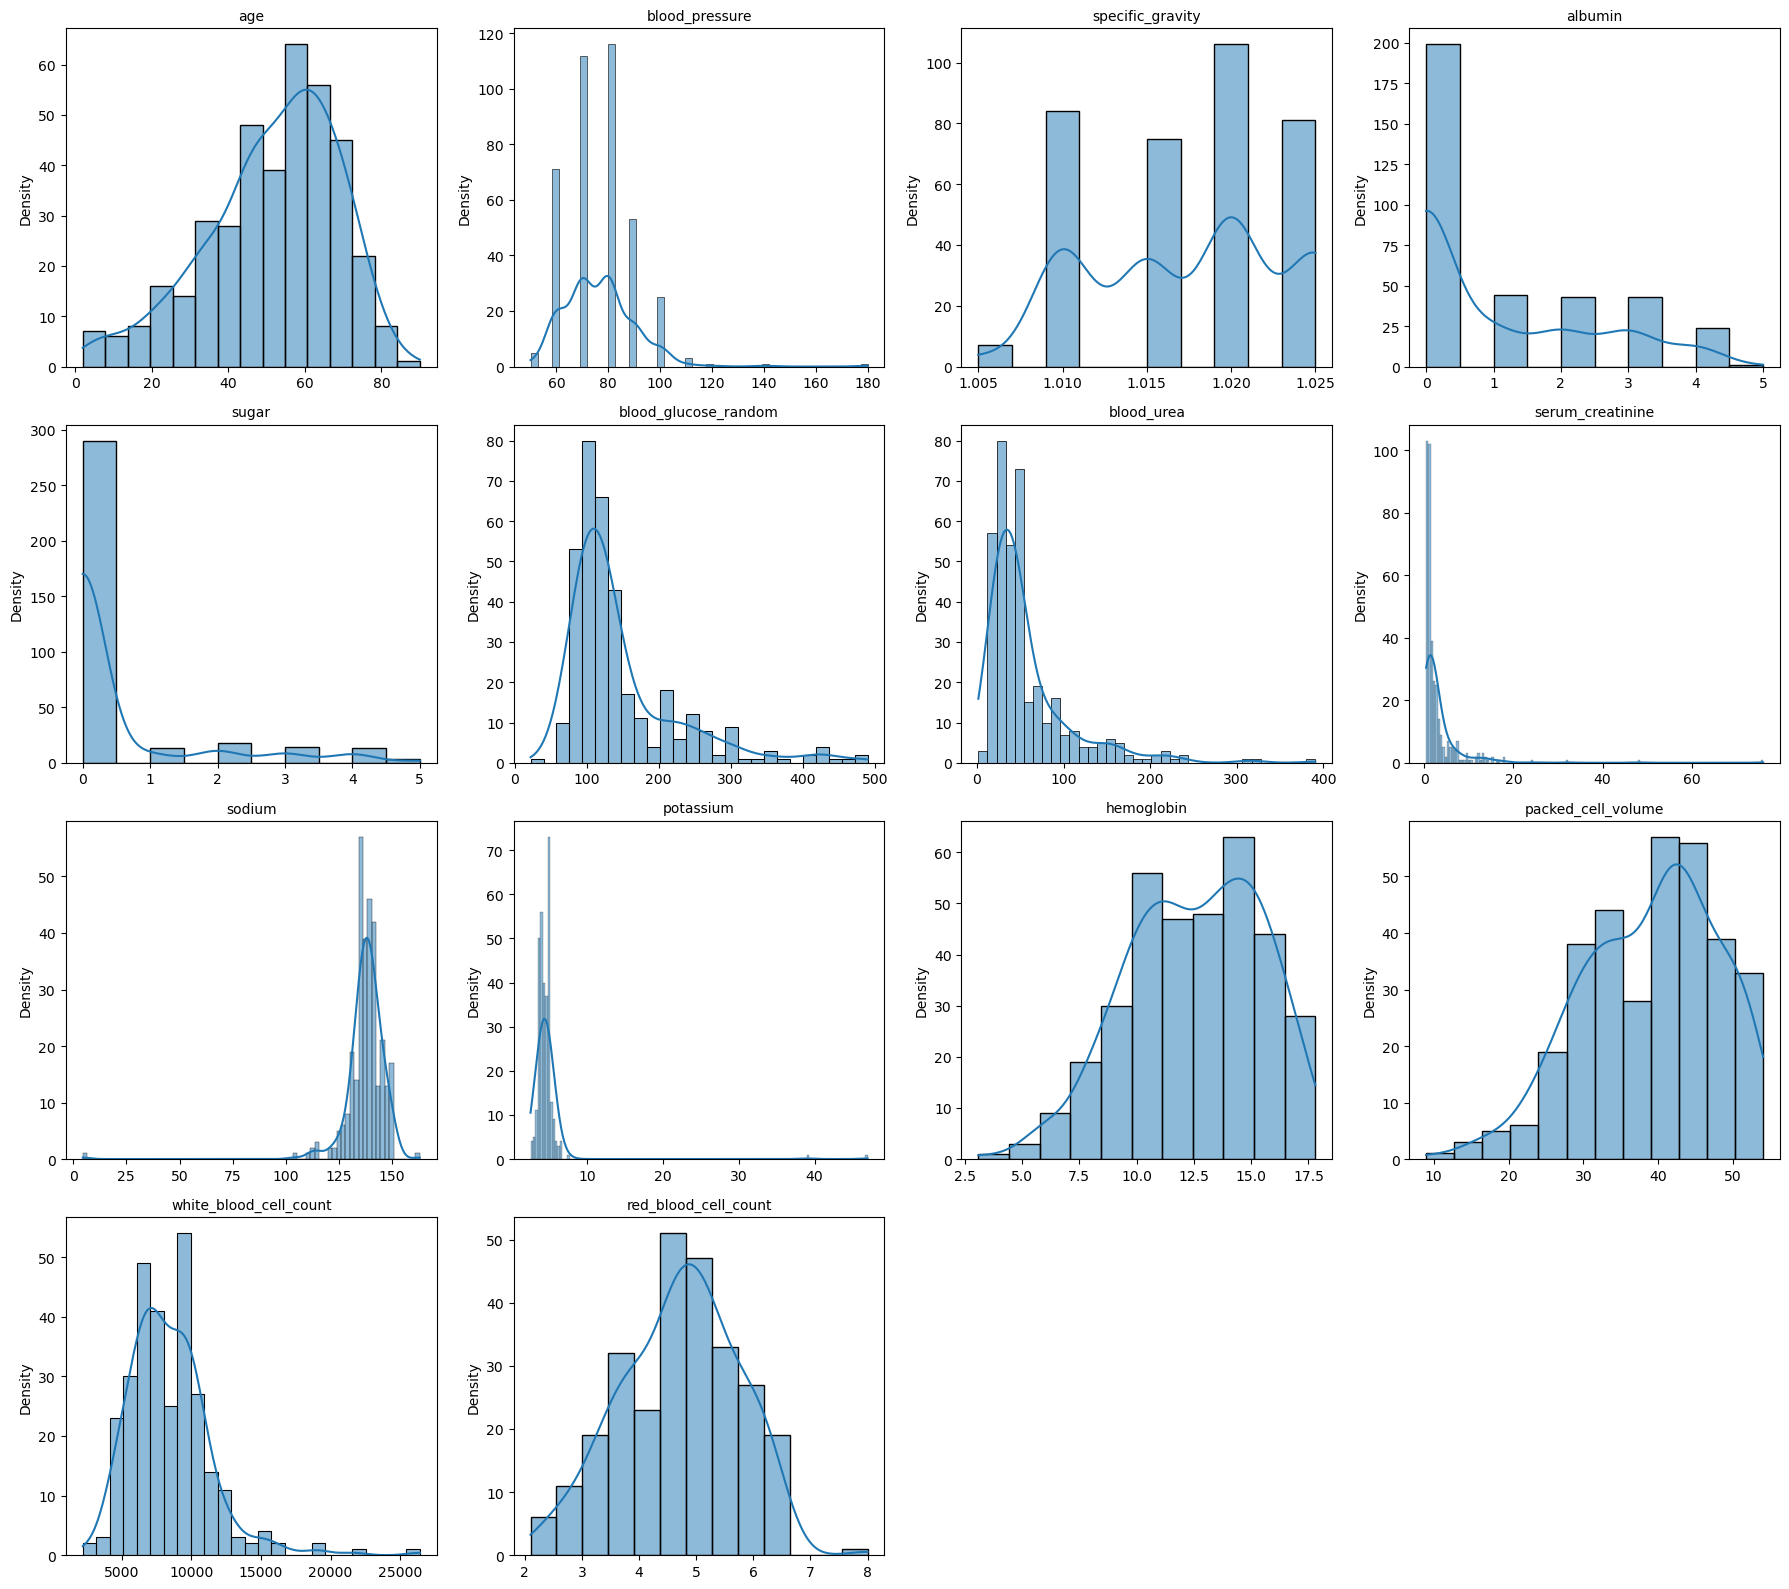

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

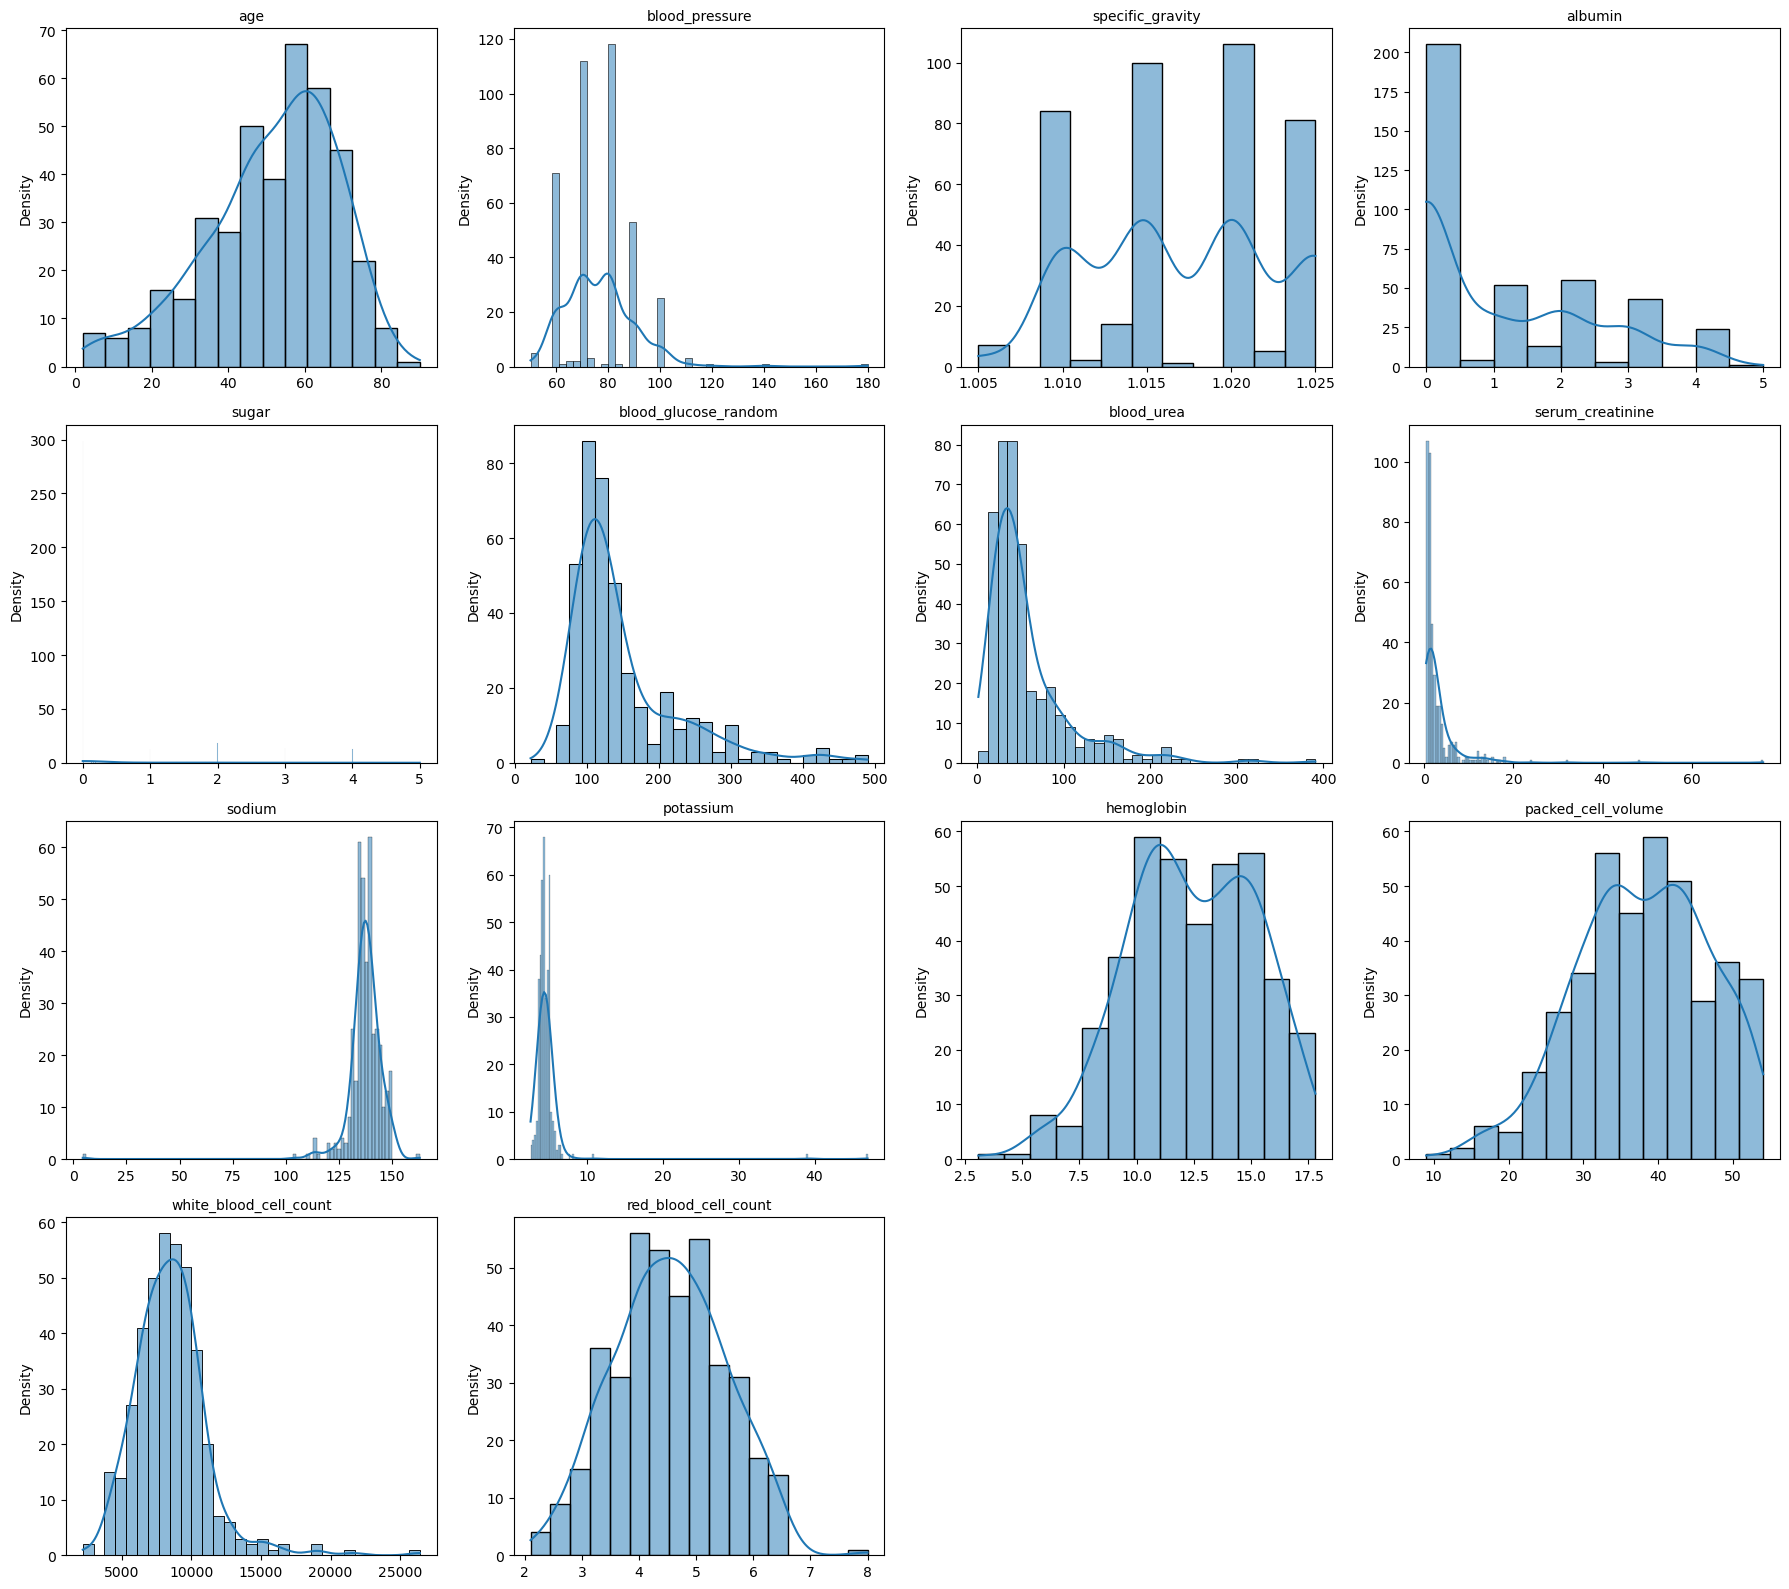

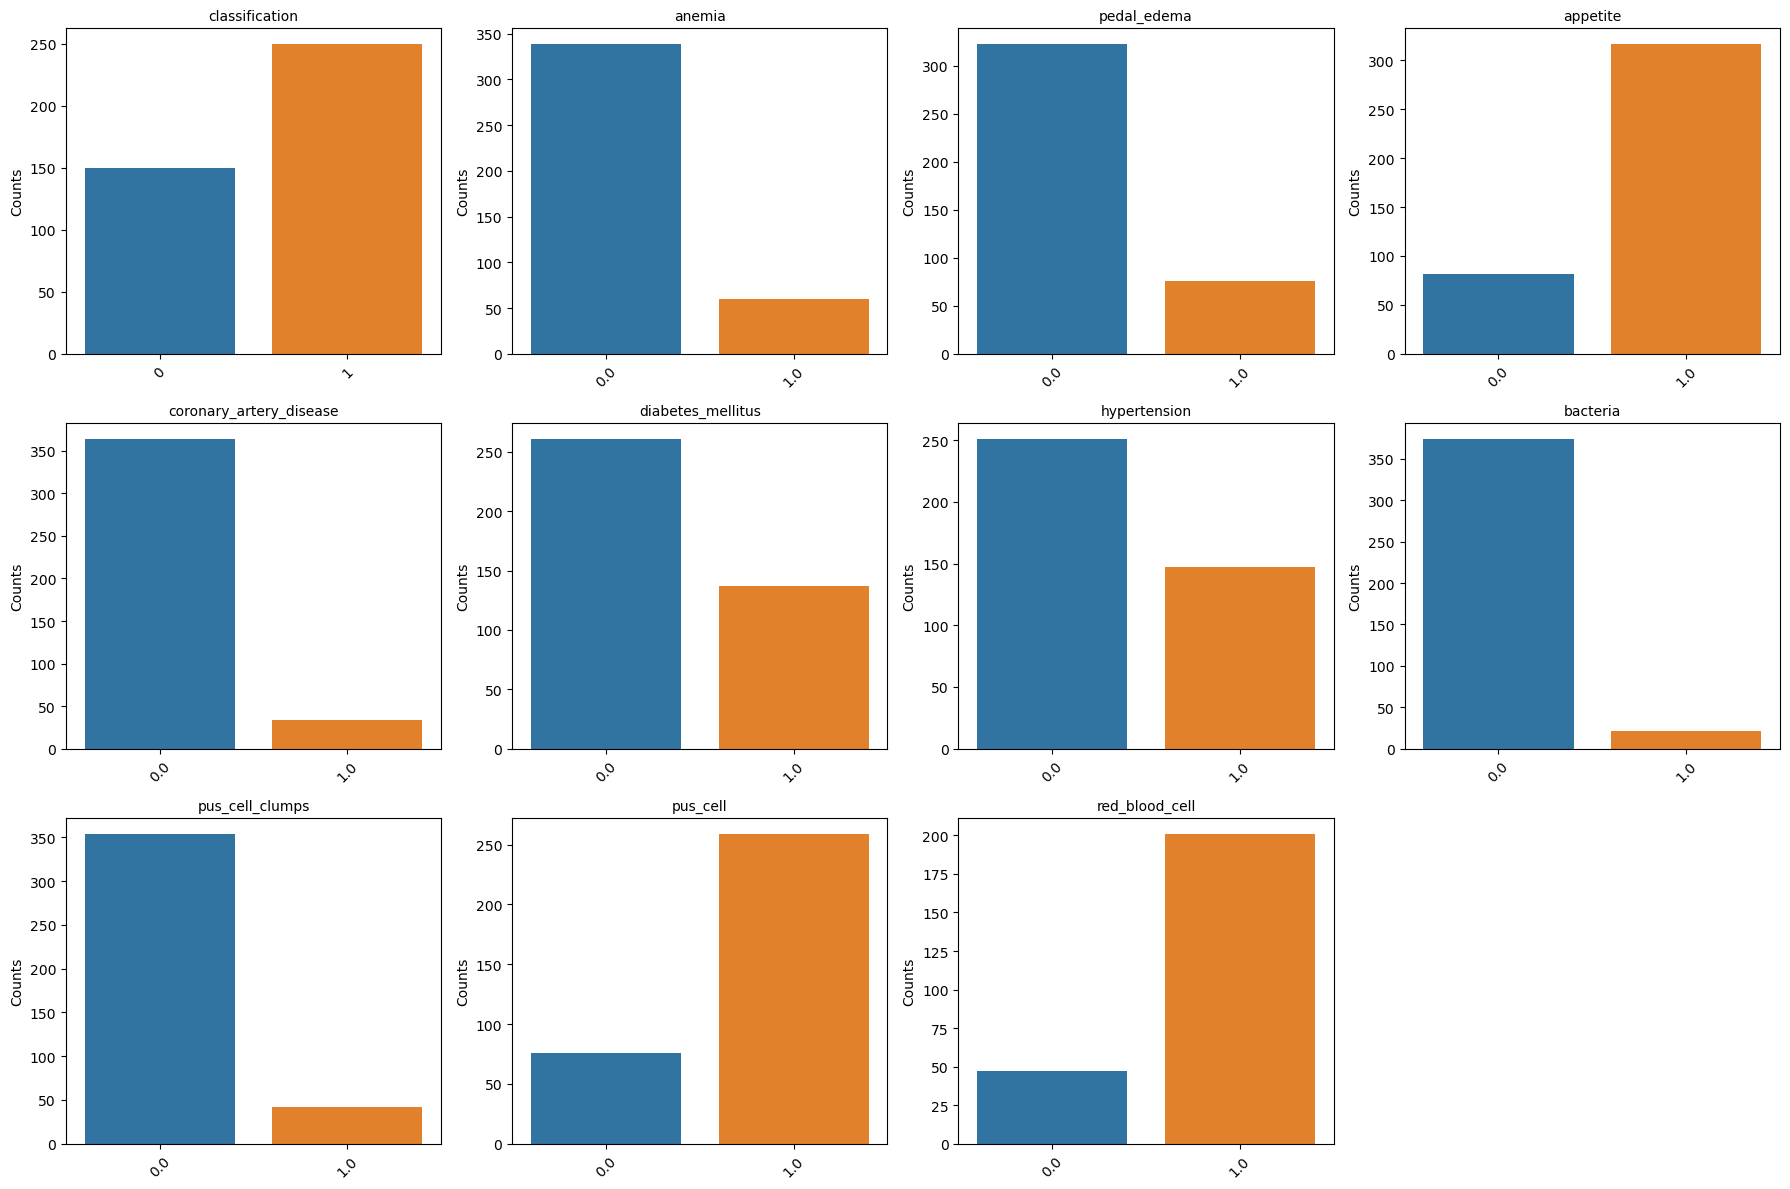

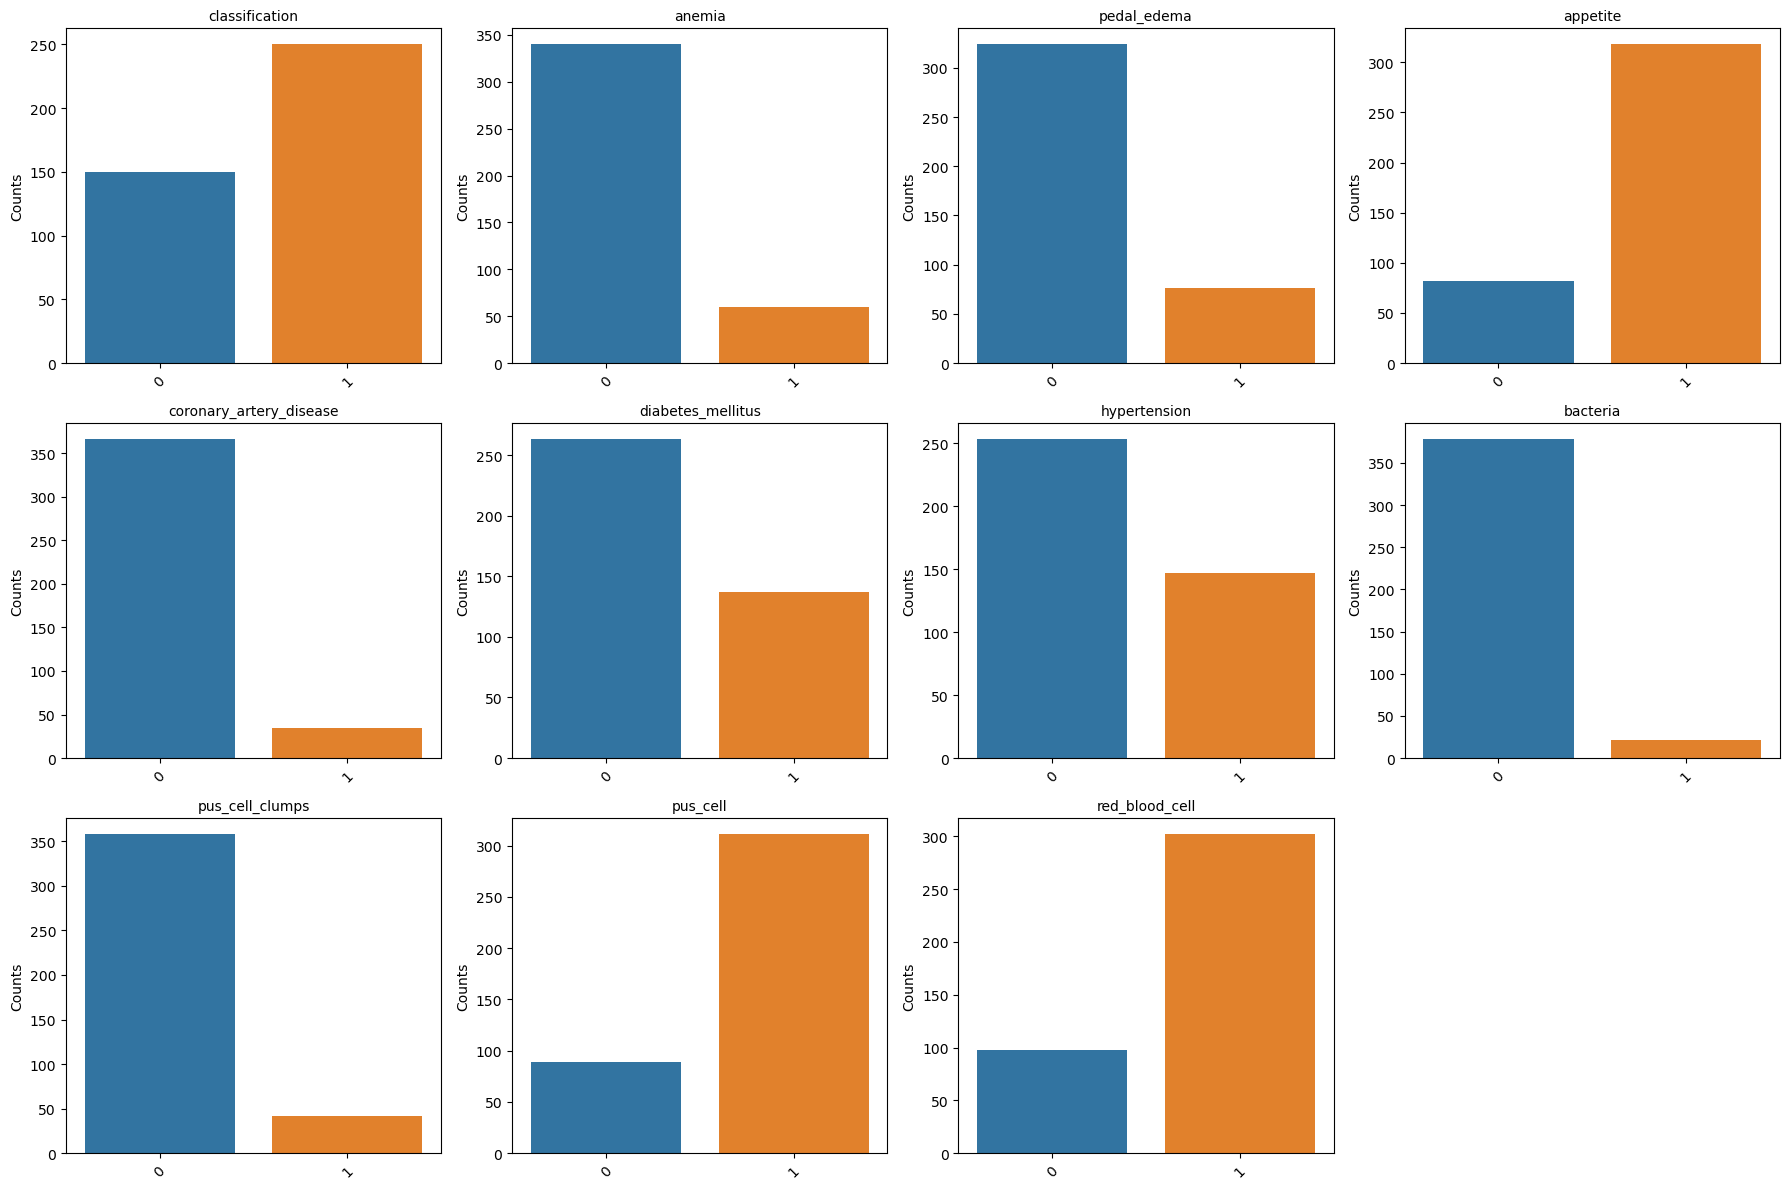

In [20]:
# Compare distributions before and after the imputation
plot_numeric_distributions(kidney, numeric_columns=num_cols)
plot_numeric_distributions(kidney_imputed, numeric_columns=num_cols)

plot_categorical_distributions(kidney, cat_cols) 
plot_categorical_distributions(kidney_imputed, cat_cols)

In [40]:
kidney_imputed.to_csv("kidney_imputed.csv", index = False)

# Train Test Splits 

In [63]:
from sklearn.model_selection import train_test_split

def split_data(df: pd.DataFrame, test_size=0.2):

    df_train, df_test = train_test_split(df, test_size=test_size, random_state=123)
    
    return df_train, df_test


In [64]:
kidney_train, kidney_test = split_data(kidney_imputed,test_size=0.3)


kidney_test.shape

(120, 25)

## Sampling
The target variable is very unbalanced, sampling methods are needed to keep the classifier stable. 

In [67]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X_train = kidney_train.drop('classification', axis = 1)
y_train = kidney_train['classification']

ros = RandomOverSampler(random_state=111) #RandomOverSampler

X_ros, y_ros = ros.fit_resample(X_train, y_train)


kidney_oversampled = pd.DataFrame(X_ros, columns=X_train.columns)
kidney_oversampled['classification'] = y_ros


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,65.0,80.0,1.015,2.0,1.0,1,1,1,0,215.00,...,41.00,9549.0,4.989,0,1,0,1,0,0,1
1,65.0,80.0,1.015,0.0,0.0,1,1,0,0,115.00,...,42.00,6800.0,5.200,0,0,0,1,0,0,1
2,60.0,90.0,1.015,3.0,0.0,1,1,0,0,74.00,...,39.00,7800.0,4.400,1,1,0,1,1,0,1
3,56.0,70.0,1.025,0.0,0.0,1,1,0,0,70.00,...,50.00,11000.0,5.100,0,0,0,1,0,0,0
4,24.0,70.0,1.025,0.0,0.0,1,1,0,0,140.00,...,48.00,5800.0,5.600,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,80.0,70.0,1.020,0.0,0.0,1,1,0,0,106.14,...,48.00,6300.0,6.100,0,0,0,1,0,0,0
340,39.0,60.0,1.020,0.0,0.0,1,1,0,0,86.00,...,51.00,5800.0,4.500,0,0,0,1,0,0,0
341,40.0,80.0,1.020,0.0,0.0,1,1,0,0,119.00,...,44.06,8890.0,5.435,0,0,0,1,0,0,0
342,38.0,80.0,1.020,0.0,0.0,1,1,0,0,99.00,...,44.00,7300.0,6.400,0,0,0,1,0,0,0


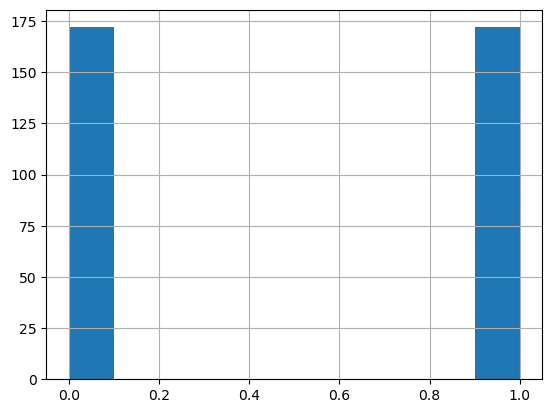

In [85]:
kidney_oversampled['classification'].hist()


kidney_oversampled

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Train dataset 
#X_train = kidney_train_oversampled.drop('classification', axis=1)
X_train = kidney_oversampled.drop('classification', axis=1)
y_train = kidney_oversampled['classification']


#Test set 
X_test = kidney_test.drop('classification', axis=1)
y_test = kidney_test['classification']


In [87]:
#Train model
classifier = DecisionTreeClassifier(random_state=42)

# Fit model
classifier.fit(X_train, y_train)

# preedictions on test dat
y_pred = classifier.predict(X_test)

#classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        78

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[42  0]
 [ 0 78]]


# Preprocessing

# Useful functions - Indepent from datasets

In [35]:
# Inspect range and datatypes of each column of a dataframe
def col_ranges_and_types(df):
    
    feature_types = df.dtypes
    
    feature_details = []
    
    for feature in df.columns:

        # categorical column 
        if feature_types[feature] == 'object':
            details = df[feature].dropna().unique().tolist()

        # Numeric column
        else:
            details = (df[feature].min(), df[feature].max())
        
        # Append feature name, range and data type 
        feature_details.append({
            'Feature': feature,
            'Value Range / Possible Values': details,
            'Data Type': feature_types[feature]
        })
    
    return pd.DataFrame(feature_details)

In [36]:
# Clean columns: remove whitespaces and tabs. Questionsmarks replace ? wit nan

def clean_columns(df):
    for col in df.columns:
        if df[col].dtype == object:
            
            # remove spaces, tabs and replace '?' with NaN
            df[col] = df[col].replace(r'\s+', '', regex=True).replace('?', np.nan)
            
    return df

# Kidney Diseases 

In [37]:
kidney.shape

(400, 25)

In [38]:
# Rename columns for more inuitive understanding
col_names_kidney = {
    'age': 'age',
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cell',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'class': 'class'
}

kidney.rename(columns=col_names_kidney, inplace=True)
kidney.drop('id', axis=1, inplace=True)
display(kidney)

KeyError: KeyError: "['id'] not found in axis"

In [39]:
(col_ranges_and_types(kidney))

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"(0.0, 1.0)",float64
6,pus_cell,"(0.0, 1.0)",float64
7,pus_cell_clumps,"(0.0, 1.0)",float64
8,bacteria,"(0.0, 1.0)",float64
9,blood_glucose_random,"(22.0, 490.0)",float64


In [40]:
# Clean Columns
kidney = clean_columns(kidney)

# There are some wrong column types: packed_cell_volume, white_blood_cell, red_blood_cell
kidney['packed_cell_volume'] = kidney['packed_cell_volume'].astype(float)
kidney['white_blood_cell_count'] = kidney['white_blood_cell_count'].astype(float)
kidney['red_blood_cell_count'] = kidney['red_blood_cell_count'].astype(float)

col_ranges_and_types(kidney)

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"(0.0, 1.0)",float64
6,pus_cell,"(0.0, 1.0)",float64
7,pus_cell_clumps,"(0.0, 1.0)",float64
8,bacteria,"(0.0, 1.0)",float64
9,blood_glucose_random,"(22.0, 490.0)",float64


## Transform binary values in 0 and 1
The binary values can derive from the table above and are namly classification, anemia, pedal_edema, appetite, coronary_artery_disease, diabetes_mellitus, hypertension, bacteria, pus_cell_clumps, pus_cell and red_blood_cells. 

We will transform that binary value into 1 and 0. 

In [41]:
binary_mapping = {
    'present': 1, 'notpresent': 0,
    'yes': 1, 'no': 0,
    'good': 1, 'poor': 0,
    'ckd': 1, 'notckd': 0, 'normal': 1, 'abnormal': 0
}


columns_to_encode = [
    'classification', 'anemia', 'pedal_edema', 'appetite', 'coronary_artery_disease',
    'diabetes_mellitus', 'hypertension', 'bacteria', 'pus_cell_clumps', 'pus_cell',
    'red_blood_cell'
]

# Perfrom encoding
for col in columns_to_encode:
    if col in kidney.columns:
        kidney[col] = kidney[col].map(binary_mapping)

# Check
col_ranges_and_types(kidney)
#kidney[columns_to_encode].head()

,Feature,Value Range / Possible Values,Data Type
0,age,"(2.0, 90.0)",float64
1,blood_pressure,"(50.0, 180.0)",float64
2,specific_gravity,"(1.005, 1.025)",float64
3,albumin,"(0.0, 5.0)",float64
4,sugar,"(0.0, 5.0)",float64
5,red_blood_cell,"(nan, nan)",float64
6,pus_cell,"(nan, nan)",float64
7,pus_cell_clumps,"(nan, nan)",float64
8,bacteria,"(nan, nan)",float64
9,blood_glucose_random,"(22.0, 490.0)",float64


In [42]:
kidney.to_csv('test.csv', index = False)

## Missing Values

In [43]:
print(kidney.isna().sum().sort_values(ascending=False))
#print(len(kidney.dropna()))
#display(kidney)

classification             400
anemia                     400
pedal_edema                400
appetite                   400
red_blood_cell             400
pus_cell                   400
pus_cell_clumps            400
bacteria                   400
coronary_artery_disease    400
diabetes_mellitus          400
hypertension               400
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
dtype: int64


In [44]:
# Correlation matrix 
corr = kidney.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')


/opt/python/envs/default/lib/python3.8/site-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/python/envs/default/lib/python3.8/site-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
age,1.000000,0.159480,-0.191096,0.122091,0.220866,nan,nan,nan,nan,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,nan,nan,nan,nan,nan,nan,nan
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,nan,nan,nan,nan,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,nan,nan,nan,nan,nan,nan,nan
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,nan,nan,nan,nan,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,nan,nan,nan,nan,nan,nan,nan
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,nan,nan,nan,nan,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,nan,nan,nan,nan,nan,nan,nan
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,nan,nan,nan,nan,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,nan,nan,nan,nan,nan,nan,nan
red_blood_cell,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pus_cell,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pus_cell_clumps,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bacteria,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,nan,nan,nan,nan,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,nan,nan,nan,nan,nan,nan,nan


    As we can see, the missing values are high correlated with other attributes from the data set. That means we could use an mzulitvariant imputer for calculating the missing values. 

    Simply drop the missing values is not appropriate since these would shrink the number of rows in the data set significantly. 

    From the sklearn documentation: "A more sophisticated approach is to use the **IterativeImputer** class, which models each feature with missing values as a function of other features, and uses that estimate for imputation"

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor # Estimator for the NA values
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [46]:
#create the imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(), 
                           missing_values=np.nan,  
                           max_iter=10, 
                           random_state=123)

kidney_imputed = imputer.fit_transform(kidney) # fit the estimator

kidney_imputed = pd.DataFrame(kidney_imputed, columns=kidney.columns)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


ValueError: ValueError: Shape of passed values is (400, 14), indices imply (400, 25)

In [47]:
# mapping to 1 and 0 by threshold
kidney_imputed[cat_cols] = kidney_imputed[cat_cols].applymap(lambda value: 1 if value > 0.5 else 0) 
kidney_imputed.isna().sum() 

IndexError: IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

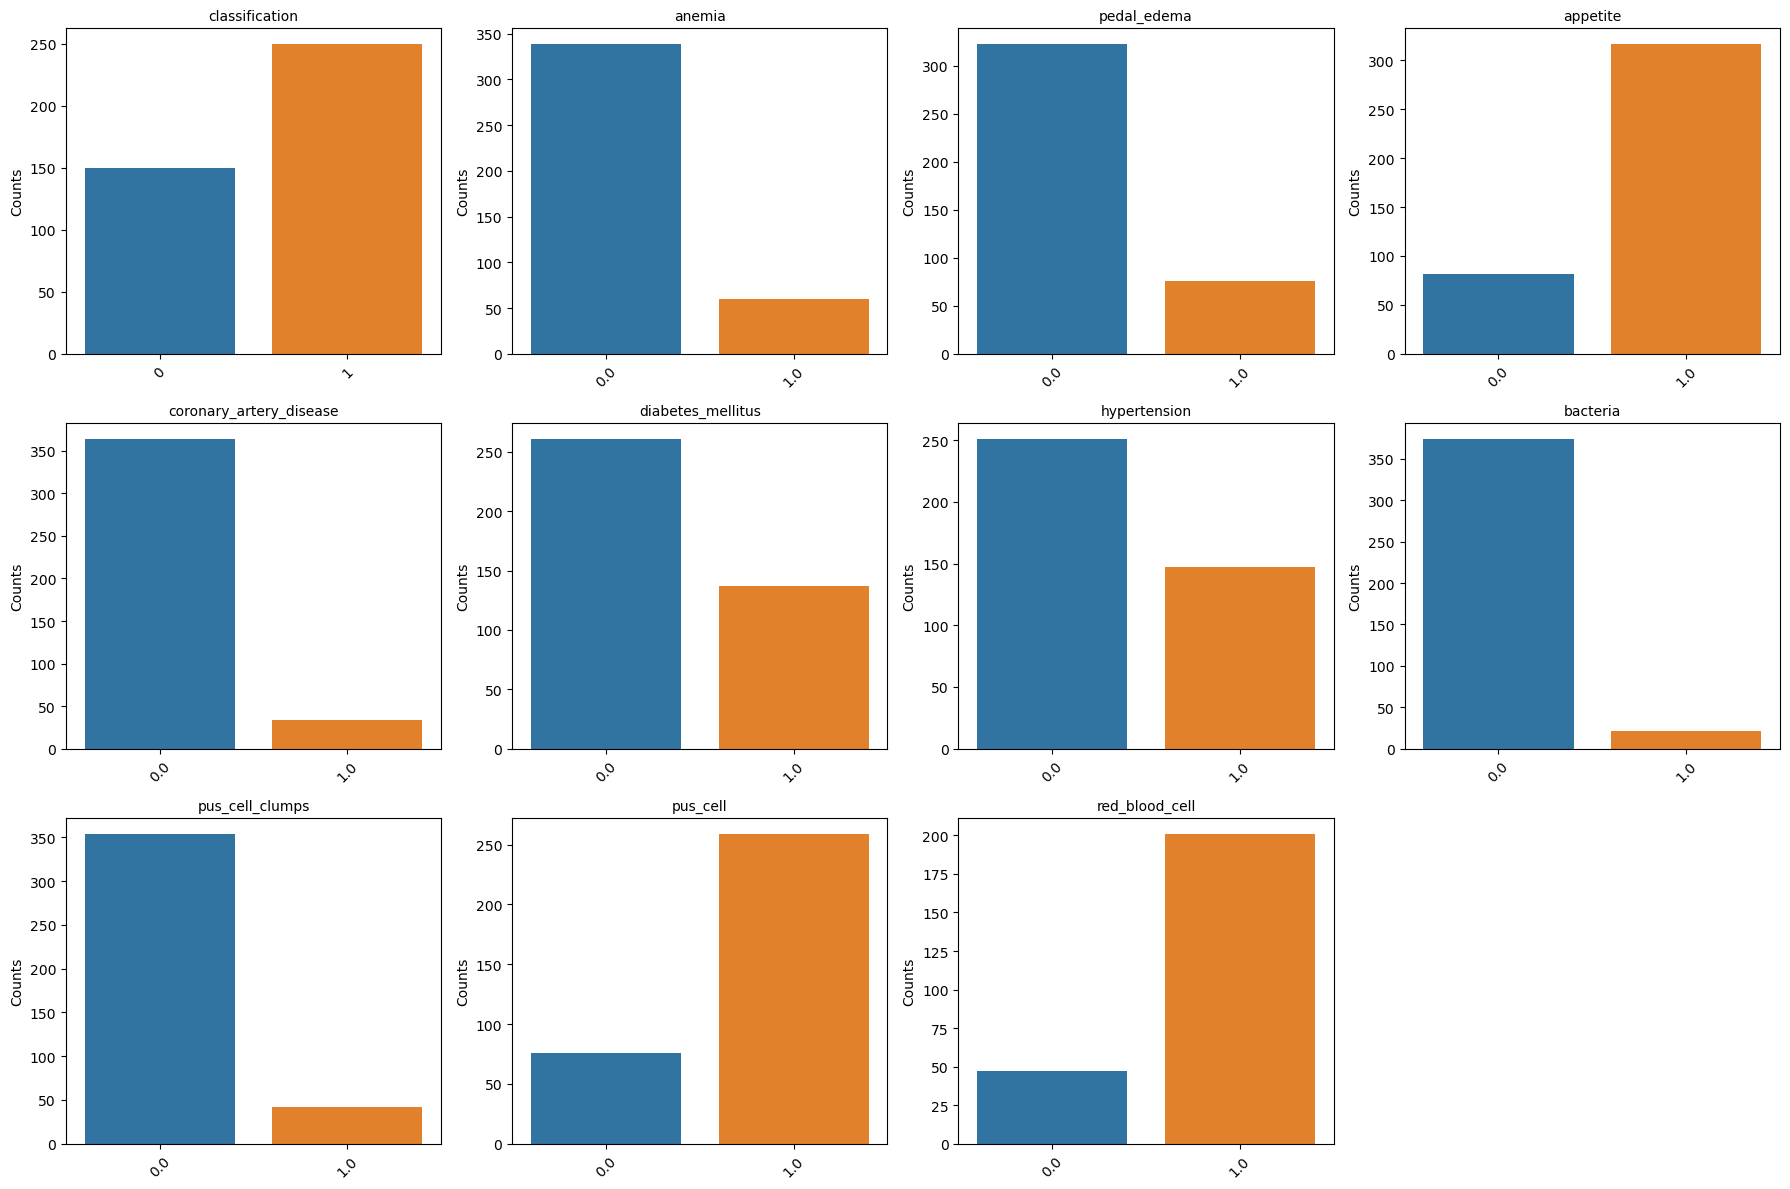

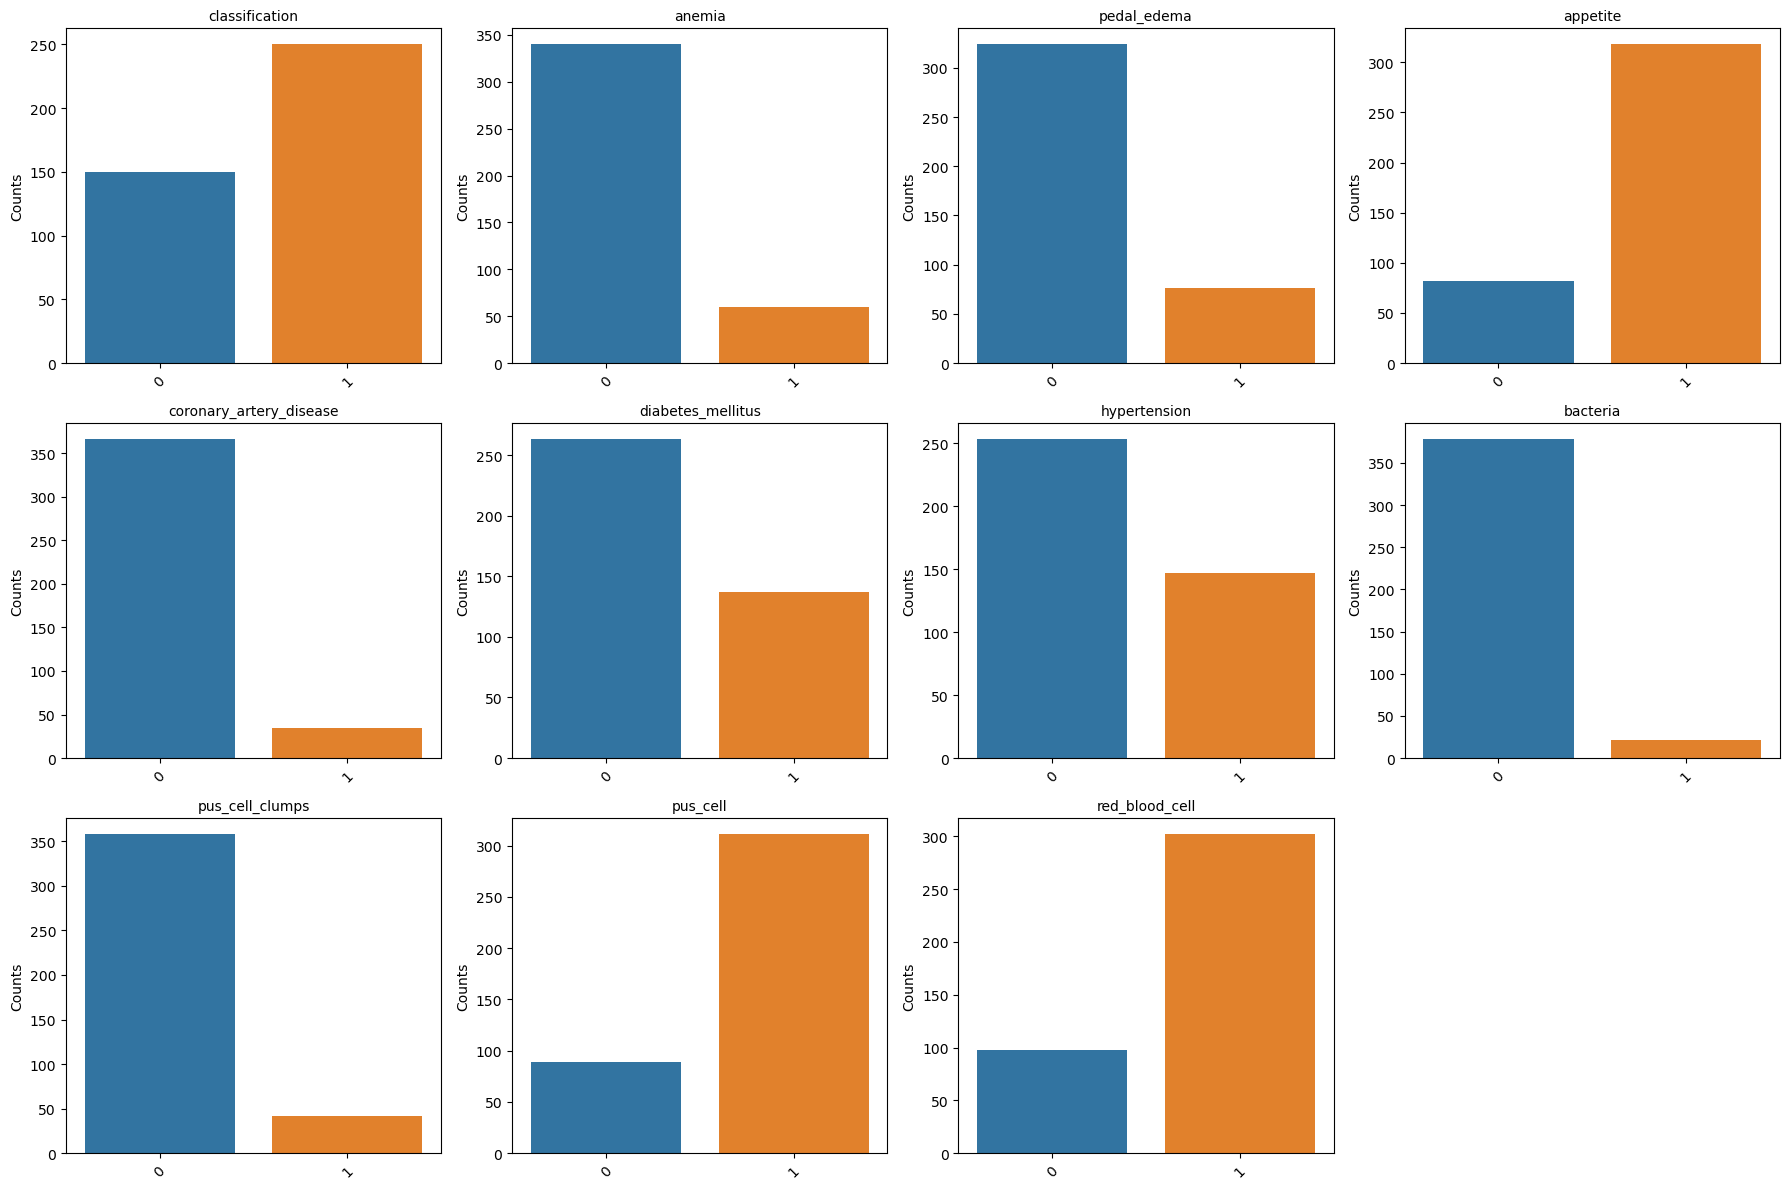

In [27]:
plot_categorical_distributions(kidney, cat_cols) 
plot_categorical_distributions(kidney_imputed, cat_cols)

In [49]:
#plot_categorical_distributions(kidney, cat_cols) 
#plot_categorical_distributions(kidney_imputed, cat_cols)

#kidney_imputed['red_blood_cell'].hist()
#kidney_imputed['pus_cell'].hist()

In [50]:
# the estianmtions for the binary variables are between 0 and 1. So we use a theshold to map the back to 1 and 

columns_to_process = ['anemia', 'pedal_edema', 'appetite', 'coronary_artery_disease', 
                      'diabetes_mellitus', 'hypertension', 'bacteria', 'pus_cell_clumps', 
                      'pus_cell', 'red_blood_cell']


df[cat_cols] = df[cat_cols].applymap(lambda value: 1 if value > 0.5 else 0)

NameError: NameError: name 'df' is not defined

# Data Exploration

## Functions for Plotting

In [51]:
def plot_numeric_distributions(df, numeric_columns = None):
   
    # number of numerical columns
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=np.number).columns

    n_cols = 4
    n_rows = int(np.ceil(len(numeric_columns) / n_cols))
    
    # grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    
    axes = axes.flatten()
    #print(axes)
    
    #  density plot for each column
    for ax, col in zip(axes, numeric_columns):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Density')

    for ax in axes[len(numeric_columns):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()



In [52]:
def plot_categorical_distributions(df, categorical_columns):
    
    
    n_cols = 4  #  columns in the grid 
    n_rows = int(np.ceil(len(categorical_columns) / n_cols))  

    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    
    # Flatten axes array for iterating
    axes = axes.flatten()
    
    #create a bar plot for each one
    for ax, col in zip(axes, categorical_columns):
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Counts')
        for item in ax.get_xticklabels(): 
            item.set_rotation(45) # rotate x ticks
        
    # Remove any unused plots
    for ax in axes[len(categorical_columns):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

# Kidney

IndexError: IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

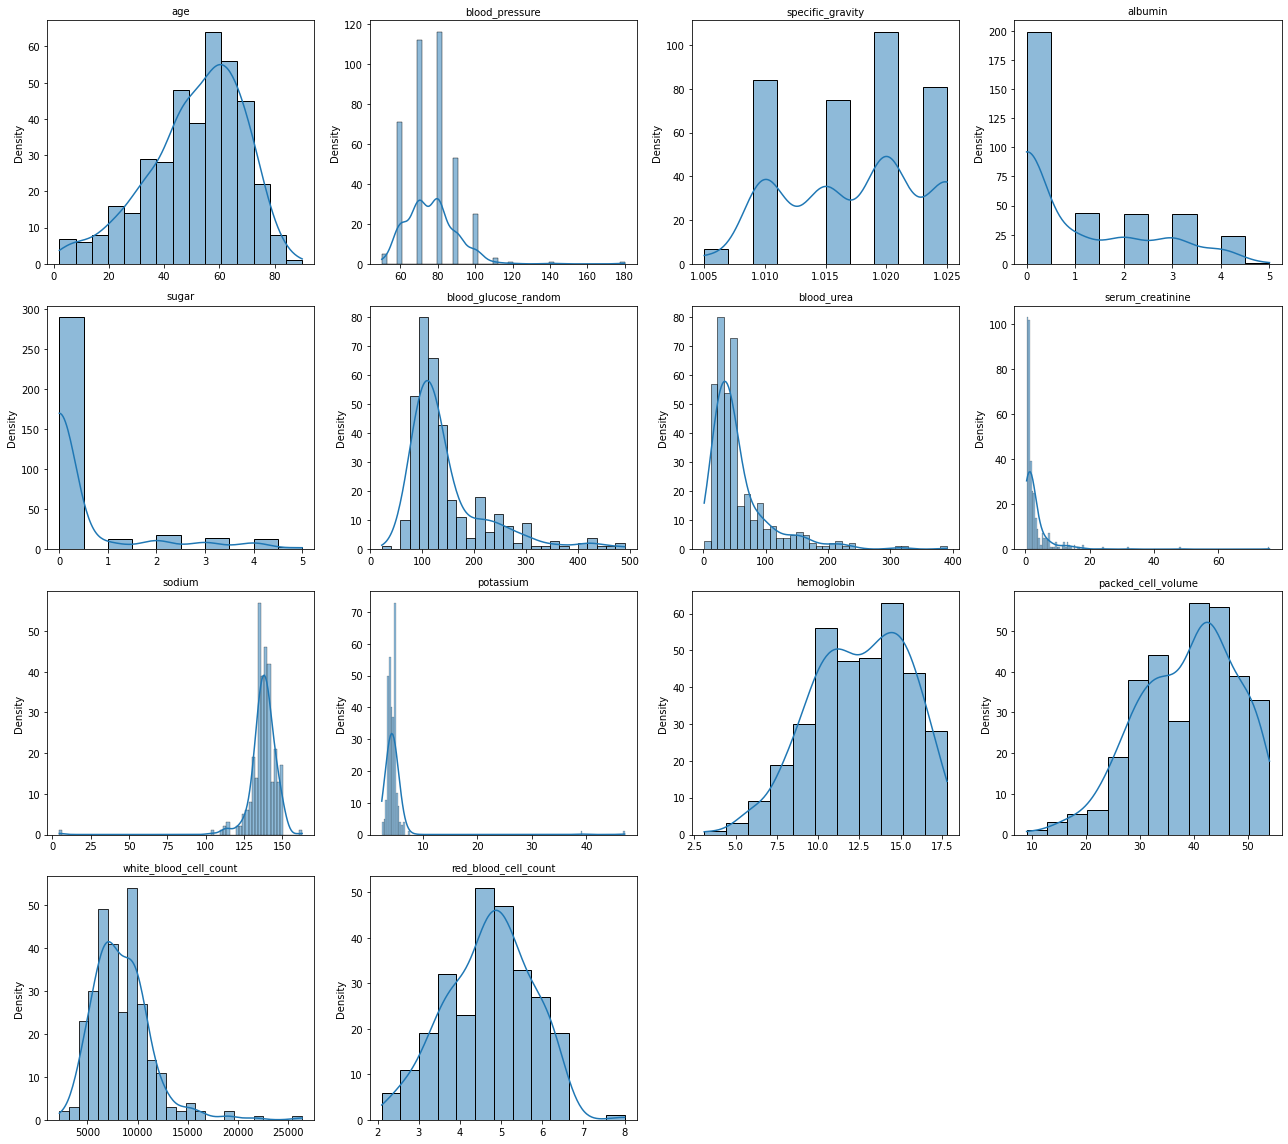

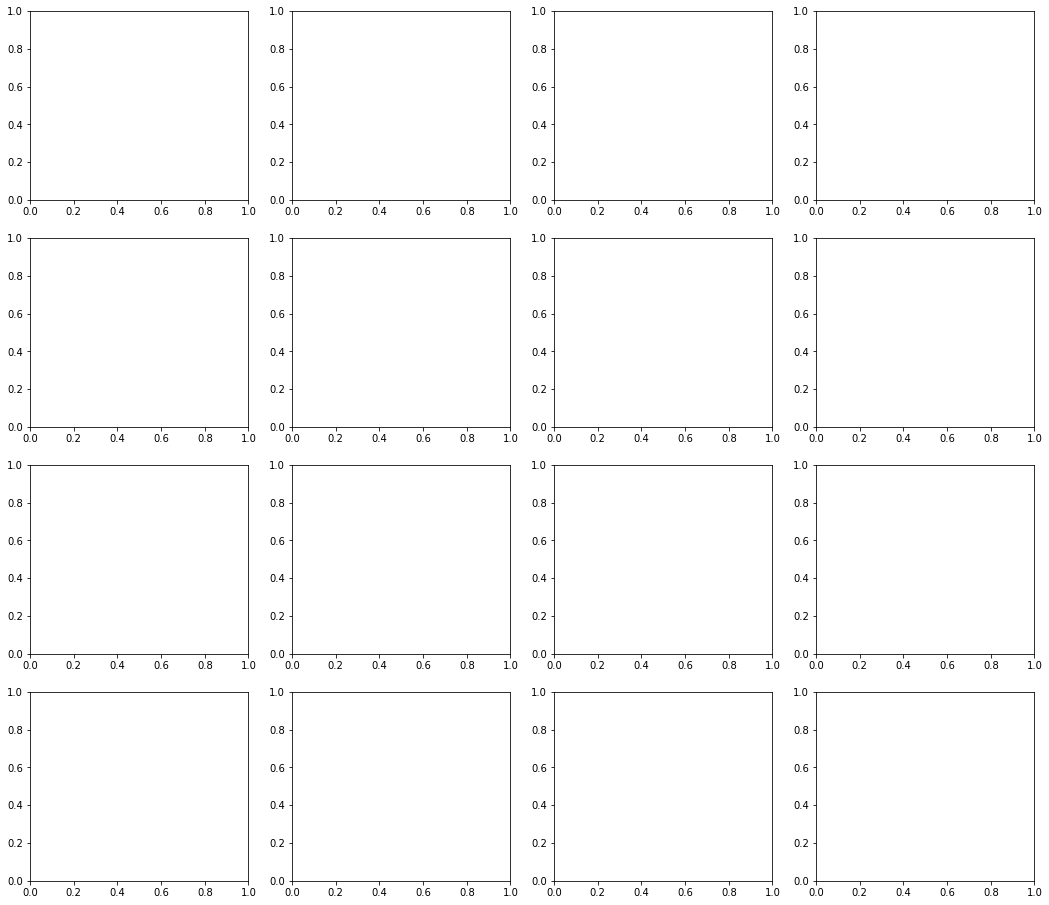

In [53]:
num_cols = ['age',
'blood_pressure',
'specific_gravity',
'albumin',
'sugar',
'blood_glucose_random',
'blood_urea',
'serum_creatinine',
'sodium',
'potassium',
'hemoglobin',
'packed_cell_volume',
'white_blood_cell_count',
'red_blood_cell_count'
]

plot_numeric_distributions(kidney, numeric_columns=num_cols)
plot_numeric_distributions(kidney_imputed, numeric_columns=num_cols)

ValueError: ValueError: min() arg is an empty sequence

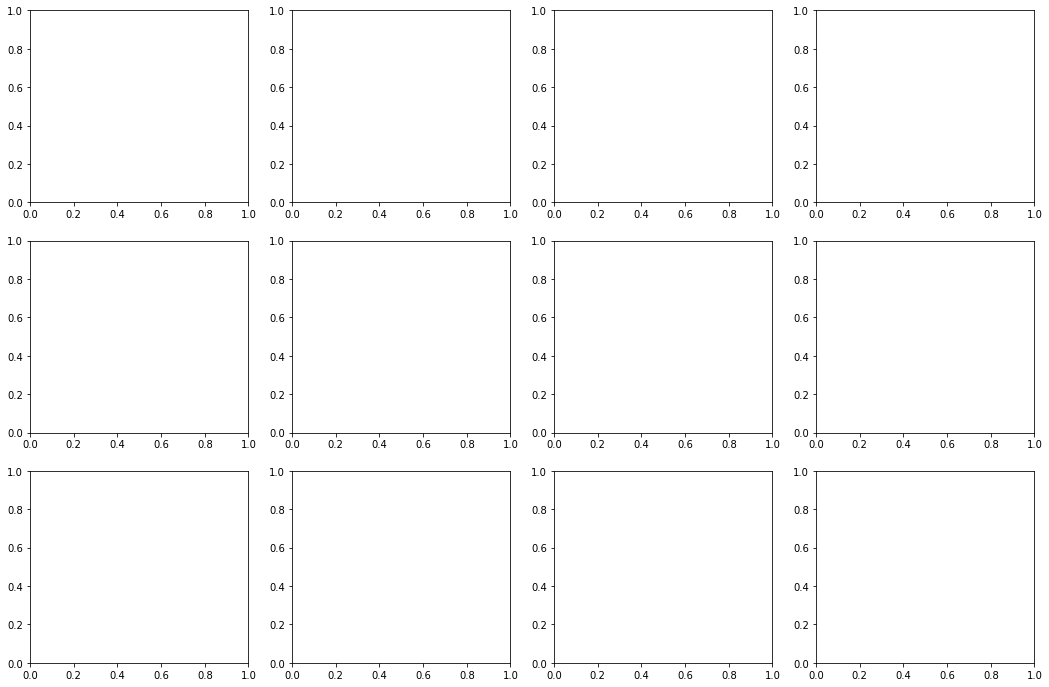

In [54]:
 cat_cols =['classification', 'anemia', 'pedal_edema', 'appetite', 'coronary_artery_disease', 
                                'diabetes_mellitus', 'hypertension', 'bacteria', 'pus_cell_clumps', 'pus_cell', 
                                'red_blood_cell']


plot_categorical_distributions(kidney, cat_cols) 
plot_categorical_distributions(kidney_imputed, cat_cols)